## Описание проекта. Общая информация

Дан датасет, полученный из открытых источников, имеющий следующие колонки:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Цель проекта - выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df_shape = df.shape
df_shape

(16715, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


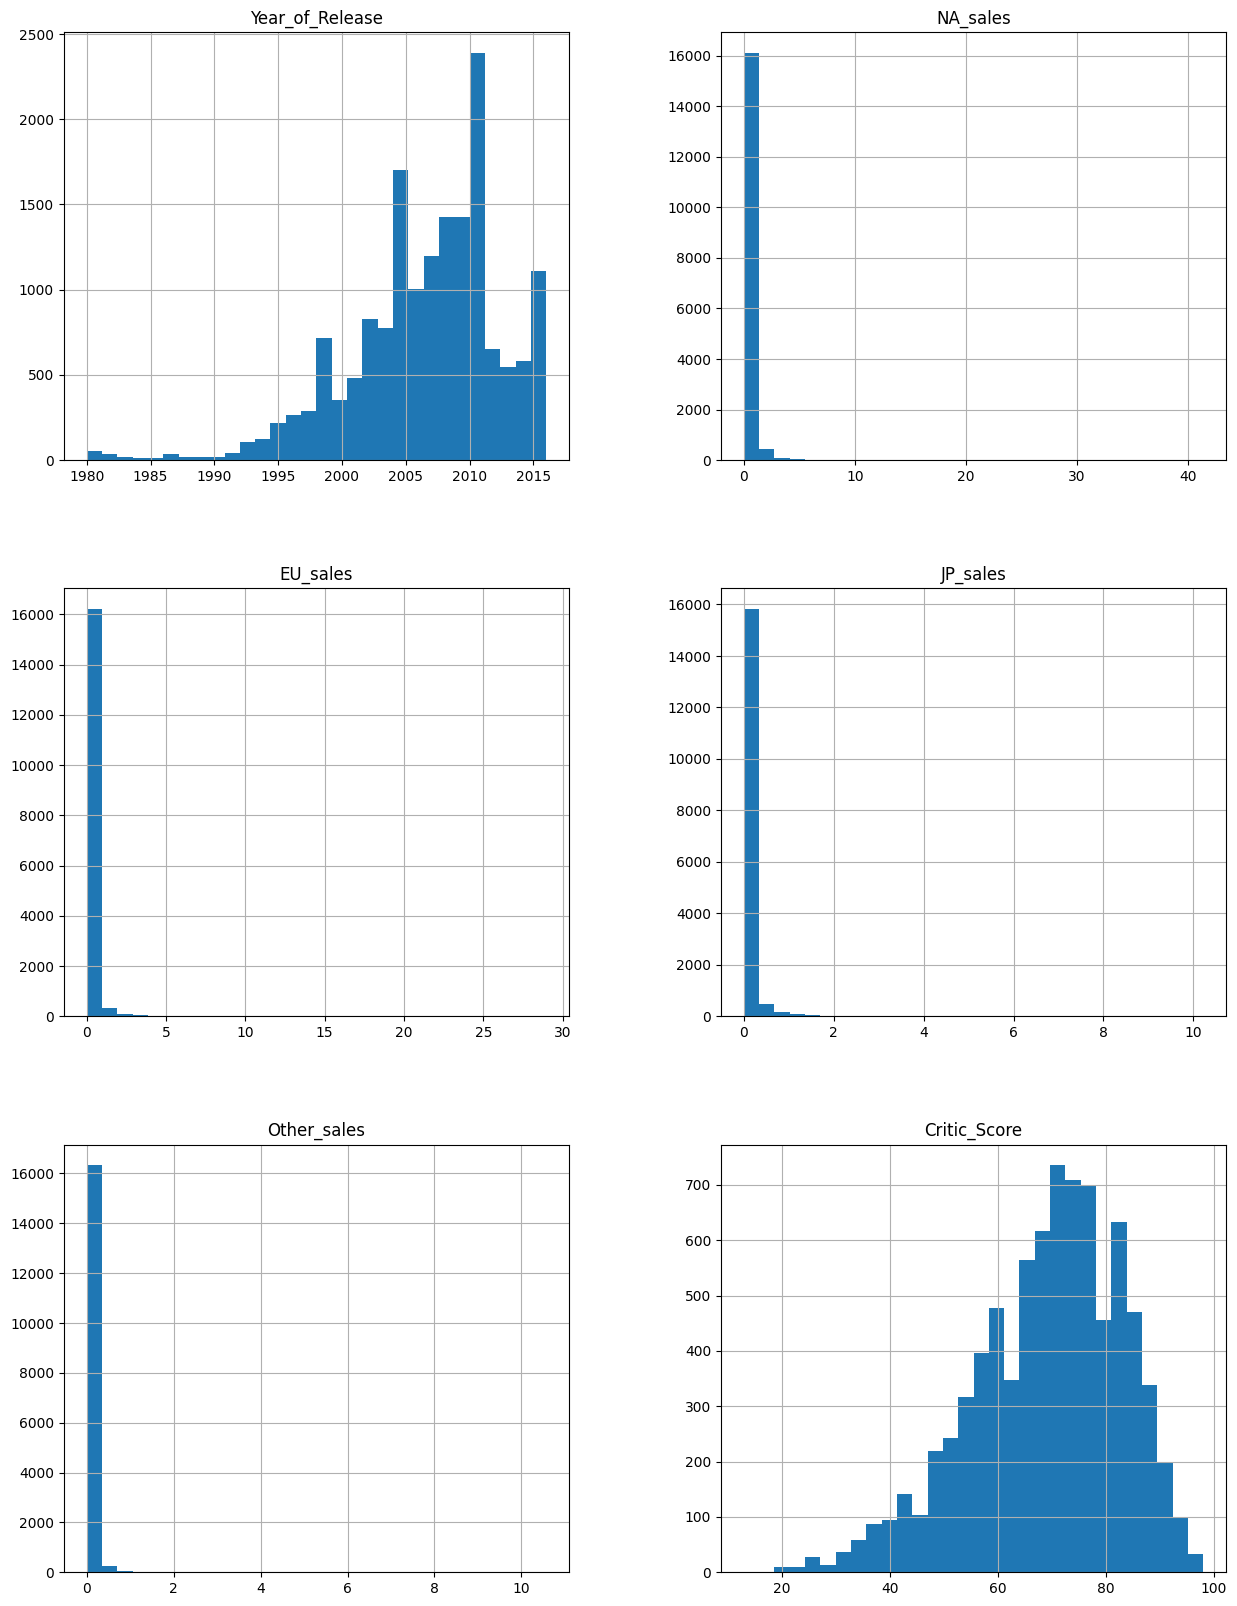

In [6]:
df.hist(bins=30, figsize=(15, 20));

In [7]:
df.select_dtypes(include=['object']).apply(pd.unique, axis=0)

Name          [Wii Sports, Super Mario Bros., Mario Kart Wii...
Platform      [Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ...
Genre         [Sports, Platform, Racing, Role-Playing, Puzzl...
User_Score    [8, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7....
Rating                    [E, nan, M, T, E10+, K-A, AO, EC, RP]
dtype: object

In [8]:
df.select_dtypes(include=['object']).nunique()

Name          11559
Platform         31
Genre            12
User_Score       96
Rating            8
dtype: int64

In [9]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [10]:
df.isna().sum()/len(df)*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [11]:
df.duplicated().sum()

0

Датасет содержит информацию по 16715 игре, с 11ю признаками.

Записи имен колонок следует привести к единообразному "змеиному" типу записи. 

Присутствуют колонки с некоректными типами, Year_of_Release следует привести к целочисленному типу, а User_Score к числовому.

Присутствуют незаполненые ячейки в колонках Name (2 строки), Year_of_Release (~ 1%), Genre (2 строки), Critic_Score (~ 51%), User_Score (~ 40%), Rating (~ 40%), следует принять решение об их удалении, заполнении или оставление в первоначальном состоянии. 

Некорректных значений в числовых колонках нет.

Явных дубликатов в строках датасета нет.

## Подготовка данных

### Приведение названий столбцов к нижнему регистру

In [12]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных к нужным типам, обработка пропусков

#### name
Нужно удалить два пустых значения, тип менять не нужно.

In [13]:
df.name.isna().sum()

2

In [14]:
df.dropna(subset=['name'], inplace=True)
df.name.isna().sum()

0

#### platform
Не требуется изменение типа, пустых значений нет.

#### year_of_release
Имеется 269 пустых значений. Какие возможно заменяю на медианные заначения, полученные группировкой по названию (Выбор медианы обусловлен тем, что она обладает слабой чувствительностью к выбросам в отличие от среднего). Оставшиеся пустые значения удаляю. Тип заменяю на 'int16'.

In [15]:
df.year_of_release.isna().sum()

269

In [16]:
df[df['name'].apply(lambda x: str(x).split()[-1].isdigit() and len(str(x).split()[-1]) == 4)][['name', 'year_of_release']][:50]

,name,year_of_release
183,Madden NFL 2004,NaN
206,Warzone 2100,1999.0
238,Madden NFL 2005,2004.0
250,Winning Eleven: Pro Evolution Soccer 2007,2006.0
283,Madden NFL 2003,2002.0
338,FIFA Soccer 2005,2004.0
349,Pro Evolution Soccer 2008,2007.0
359,Just Dance 2014,2013.0
377,FIFA Soccer 2004,NaN
393,FIFA Soccer 2003,2002.0


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>
    
провела проверку предположения о возможности извлечь год из названий, решила отказаться от этой идеи, так как таких строк очень мало (всего 8) и проверка показывает, что год в названии может быть предыдущим годом к году выхода или просто каким-то несвязным четырехзначным числом. 8 строк не стоят рисков, искажения данных. Вывод изменила.
</div>

In [17]:
df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('median'), inplace=True)
df.year_of_release.isna().sum()

146

In [18]:
df.dropna(subset=['year_of_release'], inplace=True)
df.year_of_release.isna().sum()

0

In [19]:
df['year_of_release'] = df['year_of_release'].astype('int16')
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16567, dtype: int16

#### genre
Пустые значения были удалены ранее, тип менять не нужно.

In [20]:
df['genre'].isna().sum()

0

#### na_sales, eu_sales, jp_sales, other_sales
Обработка этих столбцов не требутся

#### critic_score
Пустых значений около половины, удаление их или заполнение (средним либо медианным) может сильно исказить дальнейший анализ. Из-за присутствия пустых значений преобразование к целочисленному типу не возможно. Оставляю эту колонку как есть.

#### user_score
Все значения этой колонки числовые, кроме tbd. tbd - это "To Be Determined", то есть "Будет определено". На момент сбора данных оценки пользователя для этих строк еще не было. Заменю все значения tbd на пустые, тип приведу к float. Пустых значений больше половины, удаление их или заполнение (средним либо медианным) может сильно исказить дальнейший анализ, оставлю пустые значения.

In [21]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [22]:
df.user_score.isna().sum()

6633

In [23]:
sum(df.user_score == 'tbd')

2394

In [24]:
df['user_score'] = df.user_score.where(df.user_score != 'tbd', np.nan)
df.user_score.isna().sum()

9027

In [25]:
df['user_score'] = df['user_score'].astype('float')

#### rating
Заменять пустые ячейки на какое-либо из представленных значений возрастного рейтинга нельзя и удалять тоже, это может исказить дальнейший анализ. Добавлю еще одно значение для колонки Unknown и заменю все пустые значения им.

In [26]:
df.rating.isna().sum()

6699

In [27]:
df['rating'].fillna('Unknown', inplace=True)
df.rating.isna().sum()

0

#### Причины пропусков
Данные были получены по частям из различных открытых источников, скорее всего в каких-то из этих источников признаки рейтинга, оценок пользователей и критиков отсутствовали, поэтому пропусков в этих колонках очень много. По той же причине могут быть пропущеные значения и в колонке года выпуска игры, либо из-за аппаратных сбоев при получении данных. Отсутствие названия и жанра в двух строках скорее всего тоже из-за сбоев при скачивании данных.

#### Вывод
Изменены типы в year_of_release, user_score. Заполнены пропуски в year_of_release, rating. Удалены пропуски в name, genre, year_of_release. Пропуски в critic_score, user_score оставлены. Более 99% строк были сохранены в датасете. 

In [28]:
print(f'{df.shape[0] / df_shape[0]:.2%}')

99.11%


### Суммарные продажи во всех регионах

In [29]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


## Исследовательский анализ данных

### Распределение количества выпускаемых игр по годам. Анализ периодов.

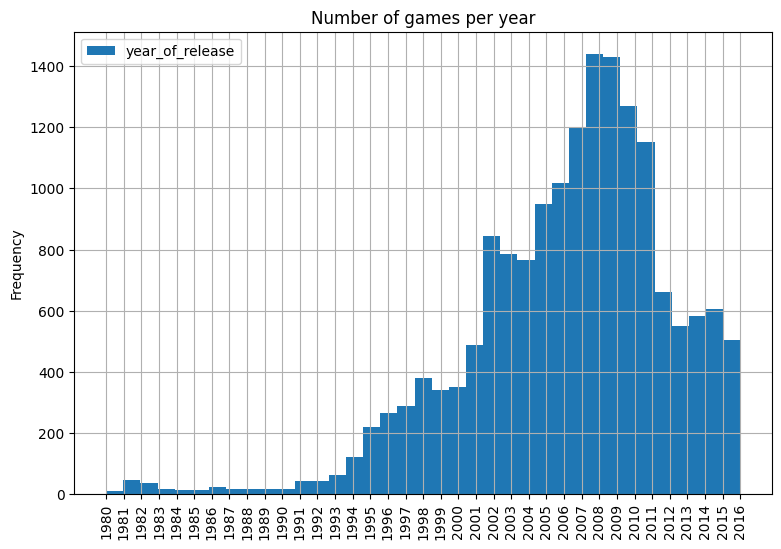

In [30]:
df['year_of_release'].plot(kind='hist',
                           xticks=range(1980, 2017),
                           bins=37,
                           grid=True,
                           rot=90,
                           title='Number of games per year',
                           legend=True,
                           figsize=(9, 6));

In [31]:
df['year_of_release'].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     340
2000     351
2001     486
2002     844
2003     784
2004     765
2005     948
2006    1019
2007    1202
2008    1441
2009    1430
2010    1269
2011    1153
2012     662
2013     548
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

In [32]:
df.groupby('year_of_release')['name'].agg('nunique')

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     547
2004     551
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

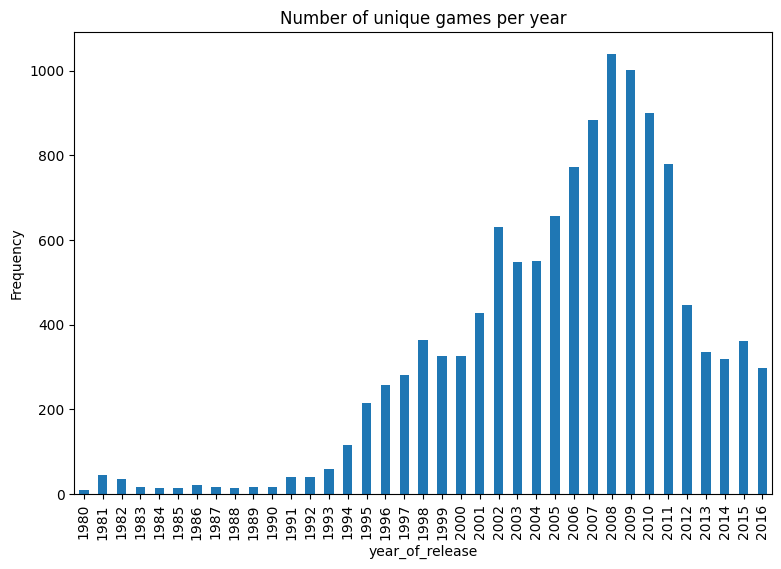

In [33]:
df.groupby('year_of_release')['name'].agg('nunique').plot(kind='bar',
                                                          rot=90,
                                                          title='Number of unique games per year',
                                                          ylabel='Frequency',
                                                          figsize=(9, 6));

С 1980 до 1994 рынок видеоигр развивался очень слабо, тогда рынок только зарождался, видеоигры создавали только энтузиасты. В 1994 начался быстрый рост количества выпущеных игр за год, который достиг своего пика в 2008. 2006 - 2011 - были самыми плодотворными годами для производителей видеоигр (в год производилось более 1000 игр или около 750 уникальных), игры стали делом огромных корпораций. В 2012 произшел резкий спад, всему виной развитие мобильных игр, спрос упал, люди стали реже играть в видеоигры. С 2012 до 2016 количество выпускаемых игр в год стабилизировалось на уровне около 550. Очевидно, что рынок видеоигр очень зависит от периода времени, нельзя делать прогнозы на 2017 по "затишью" 1980-1994 или по пику 2006-2011. 

### Изменения продаж по платформам. Платформы с наибольшими суммарными продажами и распределение по годам. Характерный срок появления и исчезновения платформ.



In [34]:
platform_by_year = df.pivot_table(columns='platform', index='year_of_release', values='name', aggfunc='count').fillna(0)
platform_by_year

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


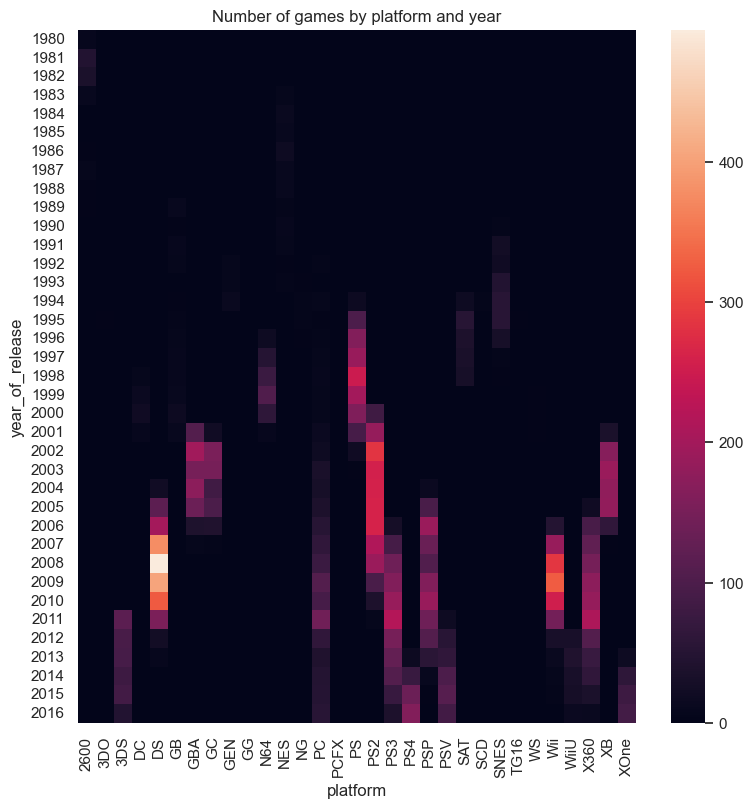

In [35]:
sns.set(rc={'figure.figsize':(9, 9)})
sns.heatmap(platform_by_year).set_title('Number of games by platform and year');

По тепловой карте построенной по количеству игр, выпущенному платформой за год, видно наиболее активные годы для каждой платформы. Например, PS выпускала большое количество игр с 1995 по 2001, а DS с 2005 по 2011.

#### 

In [36]:
total_sales_by_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
total_sales_by_platform

platform
PS2     1247.16
X360     966.61
PS3      935.19
Wii      903.31
DS       804.28
PS       727.58
PS4      314.14
GBA      313.73
PSP      293.57
PC       258.86
3DS      258.53
XB       256.69
GB       254.43
NES      251.05
N64      218.48
SNES     200.04
GC       198.66
XOne     159.32
2600      89.01
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

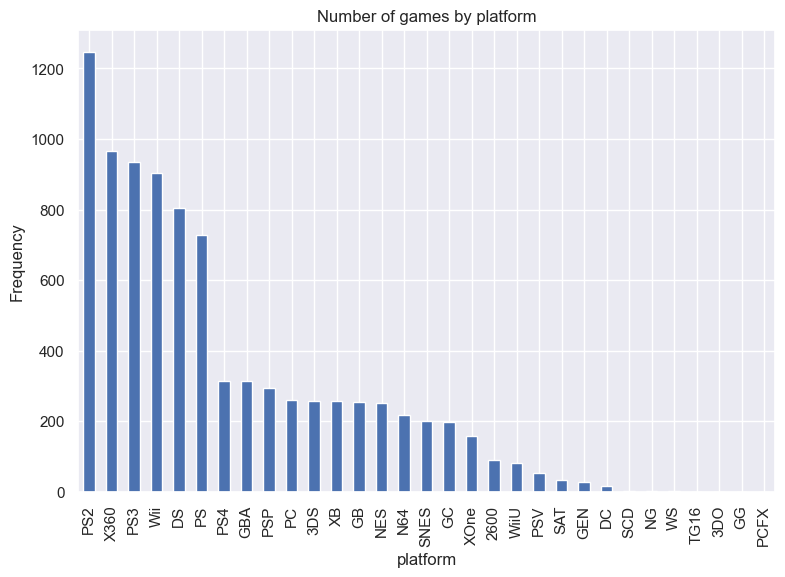

In [37]:
total_sales_by_platform.plot(kind='bar',
                             grid=True,
                             title='Number of games by platform',
                             ylabel='Frequency',
                             figsize=(9, 6));

In [38]:
best_platform = total_sales_by_platform[total_sales_by_platform > 500].index
best_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

In [39]:
best_platform_df = df[df.platform.isin(best_platform)]
best_platform_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,Unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


In [40]:
print(f'{best_platform_df.total_sales.sum() / df.total_sales.sum():.2%}')

62.96%


In [41]:
total_sales_by_platform = best_platform_df.pivot_table(columns='platform', index='year_of_release', values='total_sales', aggfunc='sum')
total_sales_by_platform

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


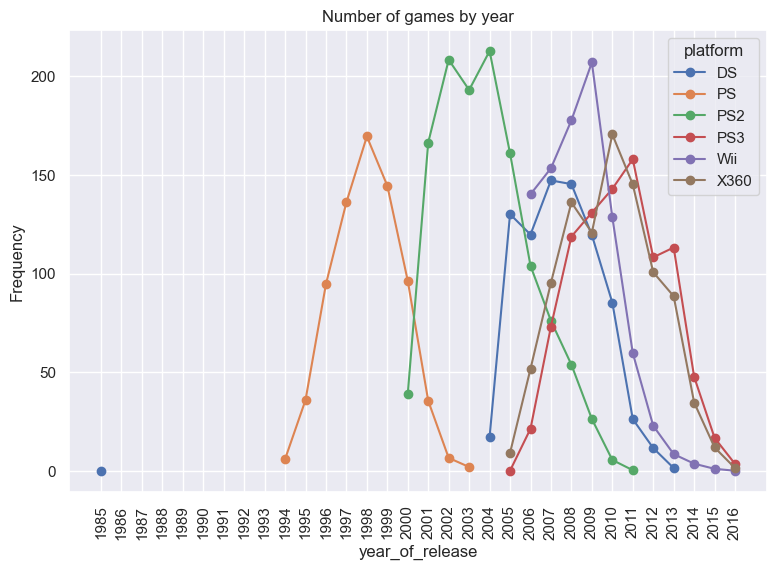

In [42]:
total_sales_by_platform.plot(kind='line',
                             grid=True, 
                             style='o-',
                             title='Number of games by year',
                             ylabel='Frequency',
                             xticks=range(1985, 2017),
                             rot=90,
                             figsize=(9, 6));

Платформы с наибольшими суммарными PS2, X360, PS3, Wii, DS, PS, их суммарные продажи составляют 62.96% от суммы всех продаж. Распределения суммарных продаж по годам для этих платформ похожи на нормальное распределение.

#### 

In [43]:
current_platforms = df[df.year_of_release == 2016]['platform'].unique()
current_platforms

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [44]:
df[~df.platform.isin(current_platforms)].groupby('platform')['year_of_release'].agg(lambda x: x.max() - x.min()).describe()

count    22.000000
mean      7.545455
std       6.745208
min       0.000000
25%       2.250000
50%       7.500000
75%      10.750000
max      28.000000
Name: year_of_release, dtype: float64

In [45]:
count_by_platform = df[~df.platform.isin(current_platforms)].pivot_table(columns='platform', index='year_of_release', values='name', aggfunc='count')
count_by_platform


platform,2600,3DO,DC,DS,GB,GBA,GC,GEN,GG,N64,...,PCFX,PS,PS2,PSP,SAT,SCD,SNES,TG16,WS,XB
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
top_year = count_by_platform.apply('idxmax')
top_year

platform
2600    1981
3DO     1995
DC      2000
DS      2008
GB      2000
GBA     2002
GC      2002
GEN     1994
GG      1992
N64     1999
NES     1986
NG      1994
PCFX    1996
PS      1998
PS2     2002
PSP     2006
SAT     1995
SCD     1994
SNES    1995
TG16    1995
WS      1999
XB      2003
dtype: int64

In [47]:
first_year = df[~df.platform.isin(current_platforms)].groupby('platform')['year_of_release'].agg('min')
first_year

platform
2600    1980
3DO     1994
DC      1998
DS      1985
GB      1988
GBA     2000
GC      2001
GEN     1990
GG      1992
N64     1996
NES     1983
NG      1993
PCFX    1996
PS      1994
PS2     2000
PSP     2004
SAT     1994
SCD     1993
SNES    1990
TG16    1995
WS      1999
XB      2000
Name: year_of_release, dtype: int16

In [48]:
last_year = df[~df.platform.isin(current_platforms)].groupby('platform')['year_of_release'].agg('max')
last_year

platform
2600    1999
3DO     1995
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2004
NES     1994
NG      1996
PCFX    1996
PS      2003
PS2     2011
PSP     2015
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
XB      2008
Name: year_of_release, dtype: int16

In [49]:
(top_year - first_year).describe()

count    22.000000
mean      3.227273
std       5.117029
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      23.000000
dtype: float64

In [50]:
(last_year - top_year).describe()

count    22.000000
mean      4.318182
std       4.335747
min       0.000000
25%       0.250000
50%       4.500000
75%       5.000000
max      18.000000
dtype: float64

Срок от выпуска первой игры до выпуска последней для платформ медианно и в среднем составляет около 8 лет. До своего топа по количеству выпускаемых игр за год платформа доходит в среднем за 3 года, медианно за 2. "Падение" платформы в среднем 4 года, медианно 5. В анализе были использованы только данные по платформам, не выпускающим игры в 2016 году, так как для работающих к 2016 году платформ срок жизни и топ развития нельзя корректно отобразить.

### Выбор актуального периода для построения прогноза на 2017 год
Для дальнейшего анализа я возьму денные за последние 3 года (2014-2016), с большой вероятностью эти данные будут содержать все платформы, которые будут на высоком уровне развития в 2017 и не будут содержать платформы, теряющие свои доли на рынке. Рынок с 2014-2016 стабилен, в год выпускается около 550 игр, суммарные объемы капитала рынка не имели активных колебаний, с большой долей вероятности эти тенденции сохранятся в 2017 году.

In [51]:
actual_df = df[df['year_of_release'] >= 2014]
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


### Платформы - лидеры по продажам. Потенциально прибыльные платформы.

In [52]:
actual_df.pivot_table(columns='platform', index='year_of_release', values='total_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


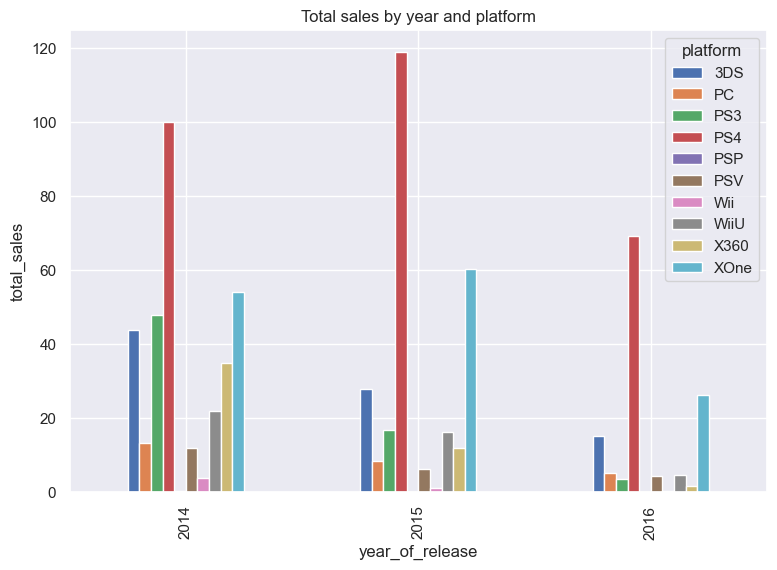

In [53]:
actual_df.pivot_table(columns='platform', 
                      index='year_of_release', 
                      values='total_sales', 
                      aggfunc='sum').plot(kind='bar',
                                          grid=True,
                                          ylabel='total_sales',
                                          title='Total sales by year and platform',
                                          figsize=(9, 6));

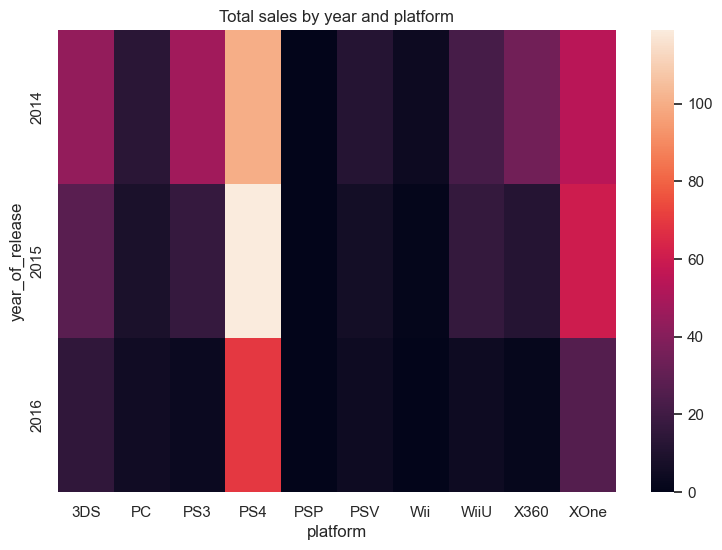

In [54]:
sns.set(rc={'figure.figsize':(9, 6)})
sns.heatmap(actual_df.pivot_table(columns='platform', 
                                  index='year_of_release', 
                                  values='total_sales', 
                                  aggfunc='sum').fillna(0)).set_title('Total sales by year and platform');

Сумма продаж по играм, выпущеным в 2016 году не полные, потому что они будут активно продаваться и давать прибыль компаниям и в 2017. Самая перспективная платформа PS4, она лидирует на рынке и не собирается сдавать позиции. Еще можно отметить XOne, виден рост данной платформы. 3DS, PC, WiiU скорее находятся на стадии спада, но тоже играют большую роль на рынке и большой вероятностью будут приносить прибыль. Потенциально прибыльные платформы - PS4, XOne, 3DS, PC, WiiU.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

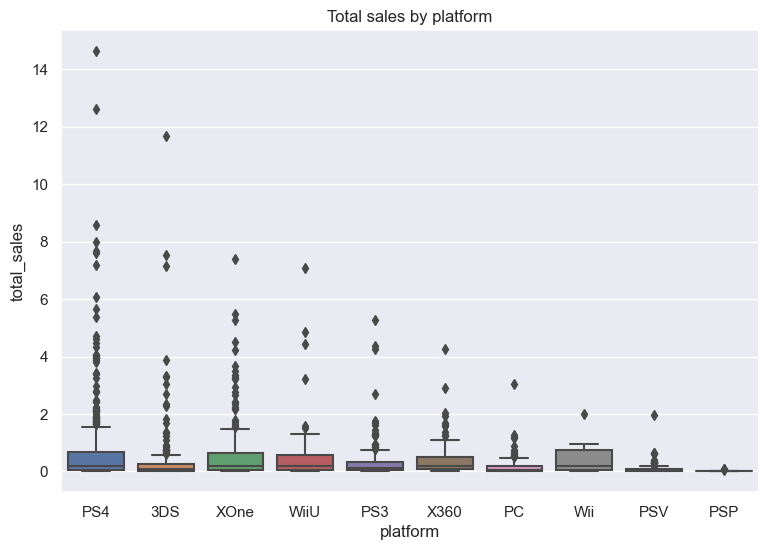

In [55]:
sns.set(rc={'figure.figsize':(9, 6)})
sns.boxplot(data=actual_df, x='platform', y='total_sales').set_title('Total sales by platform');

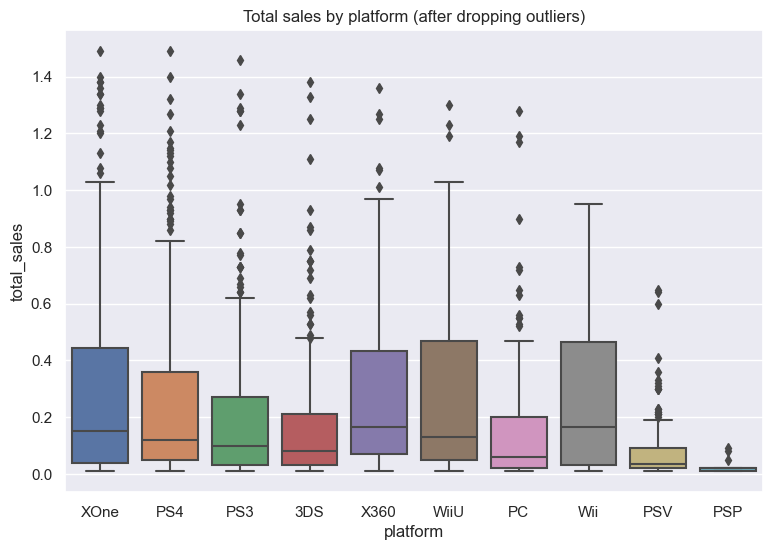

In [56]:
sns.set(rc={'figure.figsize':(9, 6)})
sns.boxplot(data=actual_df[actual_df['total_sales'] < 1.5],
            x='platform', 
            y='total_sales').set_title('Total sales by platform (after dropping outliers)');

Медианная глобальная прибыль, полученая от продажи игры и ее размах значительно отличаются для разных платформ, присутствует очень много выбросов практически для каждой платформы, это игры, которые принесли сверхприбыль. Графики распределений глобальных прибылей практически всех платформ будут иметь длинные хвосты справа, то есть значения меньше медианы будут расположены более компактно, чем значения больше медианы. Медианно с одной игры получают больше всего Wii, X360 и XOne, меньше всего PSP, PSV, PC.

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Диаграмма рассеяния и матрица корреляции между отзывами и продажами.

In [57]:
PS4_df = actual_df[(actual_df.platform == 'PS4')]
PS4_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,Unknown,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [58]:
PS4_df[['total_sales', 'user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


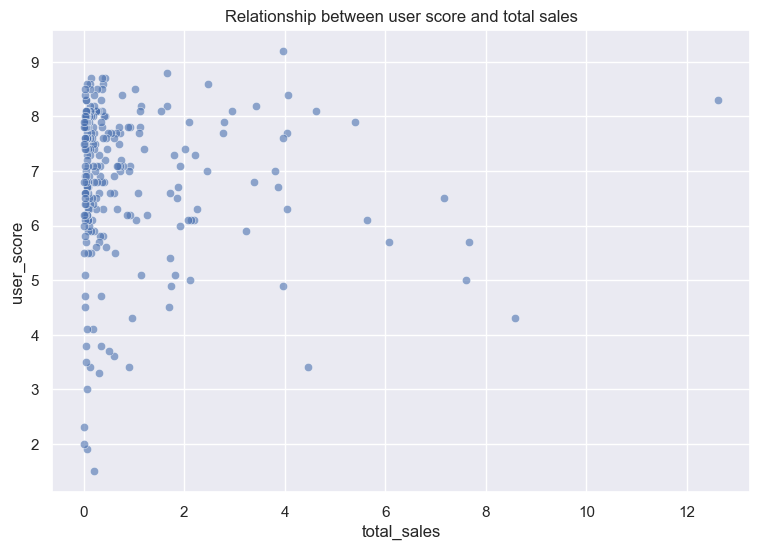

In [59]:
sns.set(rc={'figure.figsize':(9, 6)})
sns.scatterplot(data=PS4_df, x='total_sales', y='user_score', alpha=0.6).set_title('Relationship between user score and total sales');

In [60]:
PS4_df[['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.402661
critic_score,0.402661,1.000000


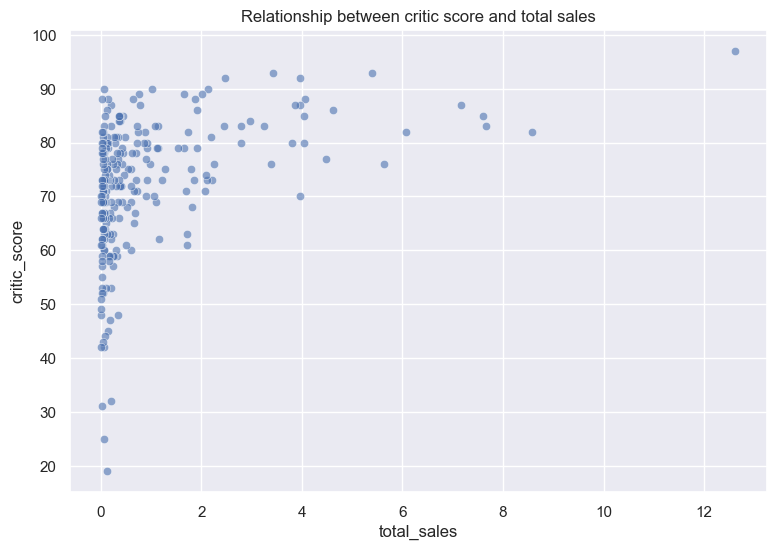

In [61]:
sns.set(rc={'figure.figsize':(9, 6)})
sns.scatterplot(data=PS4_df, x='total_sales', y='critic_score', alpha=0.6).set_title('Relationship between critic score and total sales');

Для анализа выберу PS4. Между отзывами пользователей и продажами отсутствует корреляция, между отзывами критиков и продажами есть средняя положительная корреляция. Возможно, либо покупатели ориентируются на отзывы критиков решаясь на покупку игры, либо критики высоко оценивают популярные у покупателей игры. Но очевидно, что продажи зависят не только от отзывов критиков.

### Соотнесение выводов с продажами игр на других платформах.

In [62]:
platforms = actual_df.platform.unique()
platforms

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

platform: PS4
number of scores: 242
user score and total sales:
             total_sales  user_score
total_sales     1.000000   -0.040132
user_score     -0.040132    1.000000
number of scores: 237
critic score and total sales:
              total_sales  critic_score
total_sales      1.000000      0.402661
critic_score     0.402661      1.000000



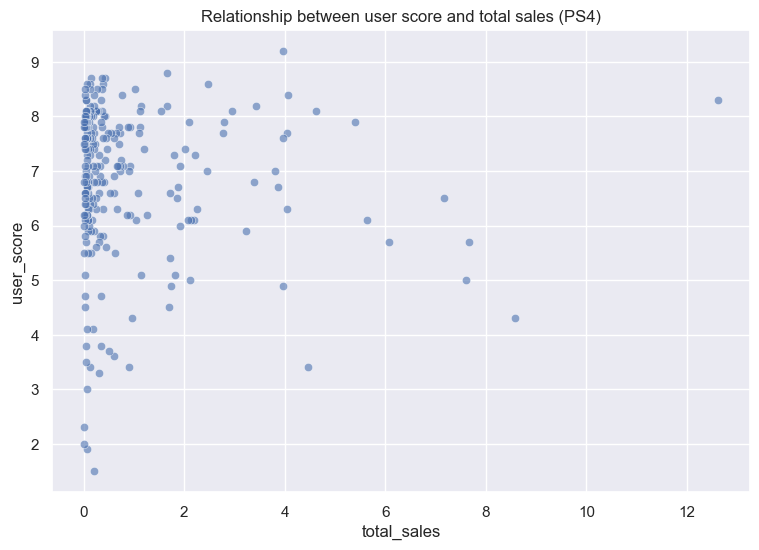

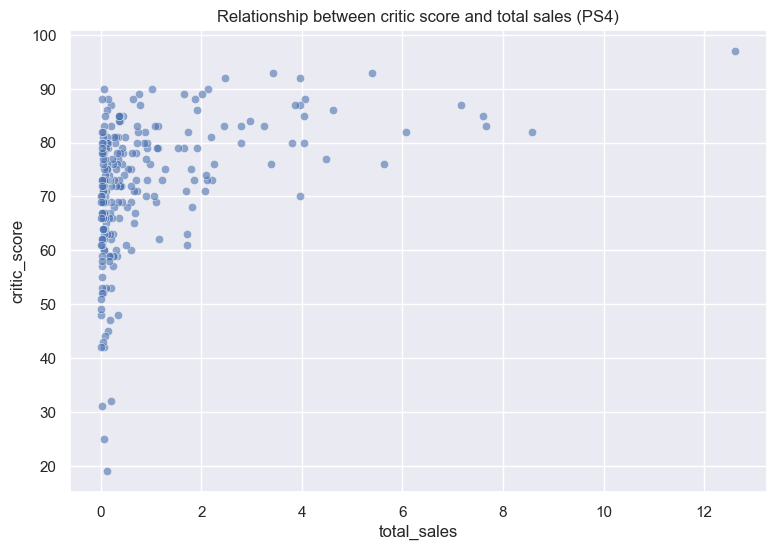

platform: 3DS
number of scores: 55
user score and total sales:
             total_sales  user_score
total_sales     1.000000    0.215193
user_score      0.215193    1.000000
number of scores: 51
critic score and total sales:
              total_sales  critic_score
total_sales      1.000000      0.314117
critic_score     0.314117      1.000000



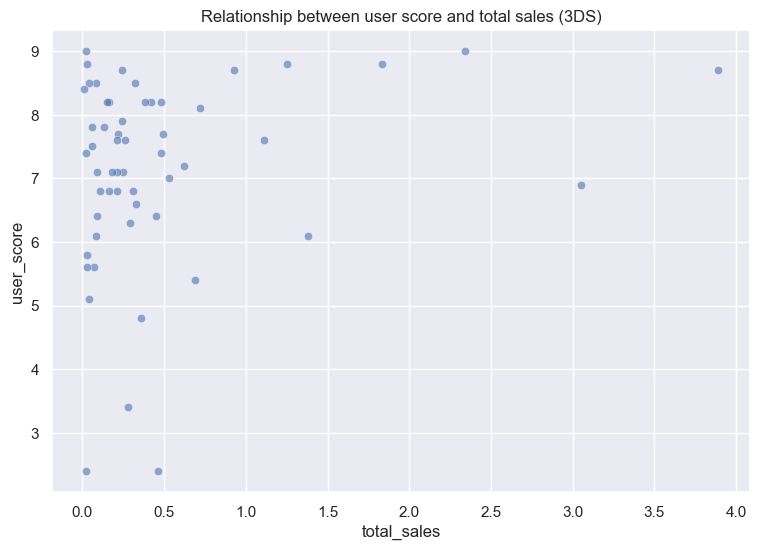

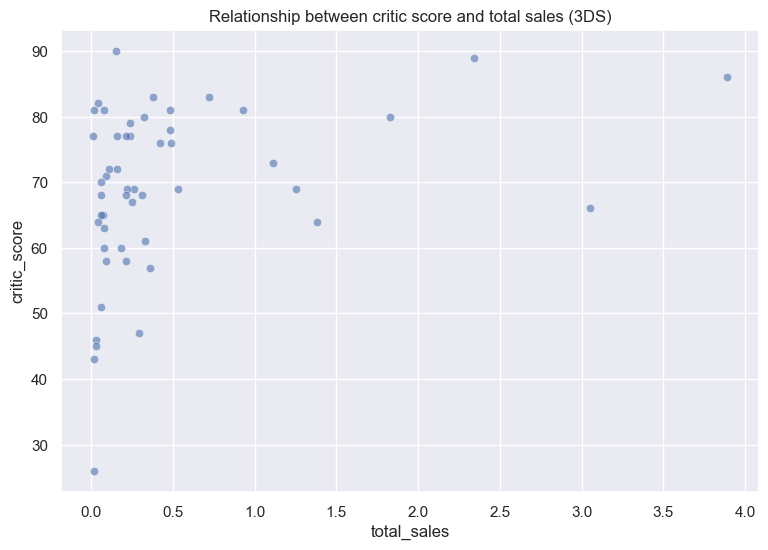

platform: XOne
number of scores: 165
user score and total sales:
             total_sales  user_score
total_sales     1.000000   -0.070384
user_score     -0.070384    1.000000
number of scores: 155
critic score and total sales:
              total_sales  critic_score
total_sales      1.000000      0.428677
critic_score     0.428677      1.000000



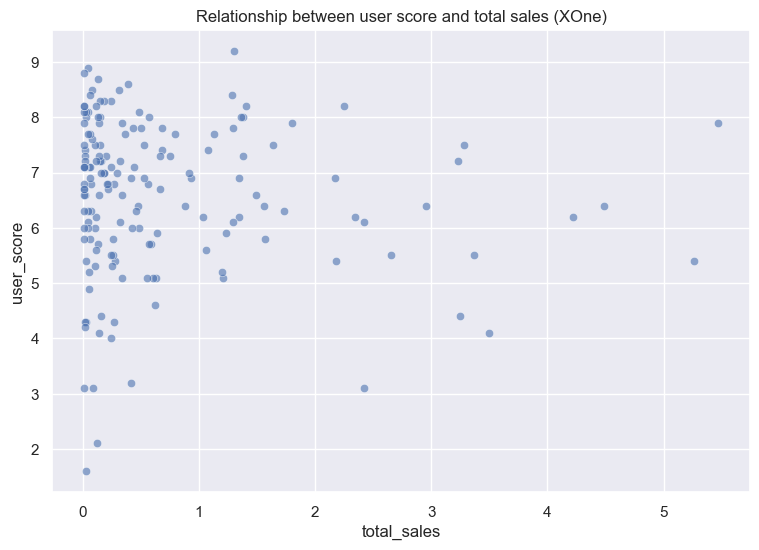

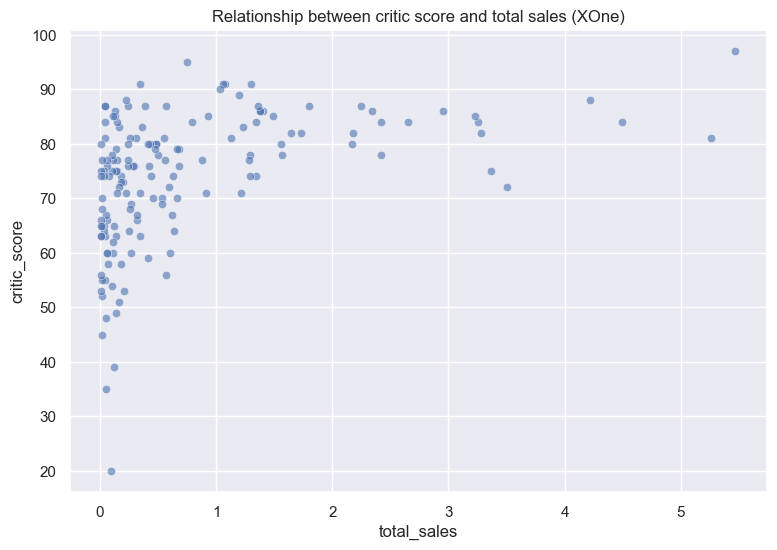

platform: WiiU
number of scores: 48
user score and total sales:
             total_sales  user_score
total_sales     1.000000    0.407926
user_score      0.407926    1.000000
number of scores: 43
critic score and total sales:
              total_sales  critic_score
total_sales      1.000000      0.370201
critic_score     0.370201      1.000000



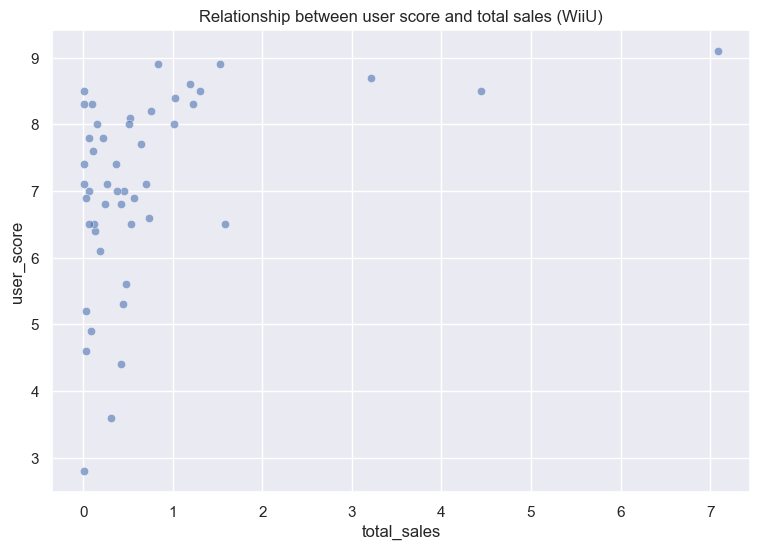

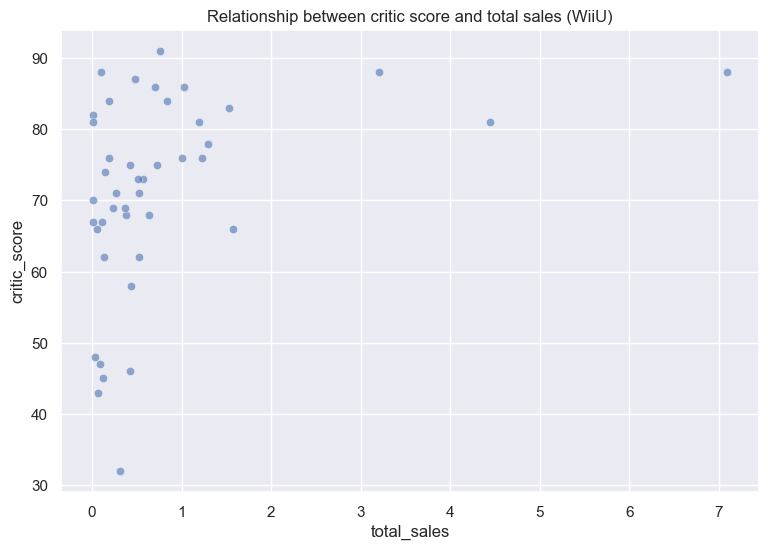

platform: PS3
number of scores: 98
user score and total sales:
             total_sales  user_score
total_sales     1.000000   -0.166761
user_score     -0.166761    1.000000
number of scores: 36
critic score and total sales:
              total_sales  critic_score
total_sales      1.000000      0.446575
critic_score     0.446575      1.000000



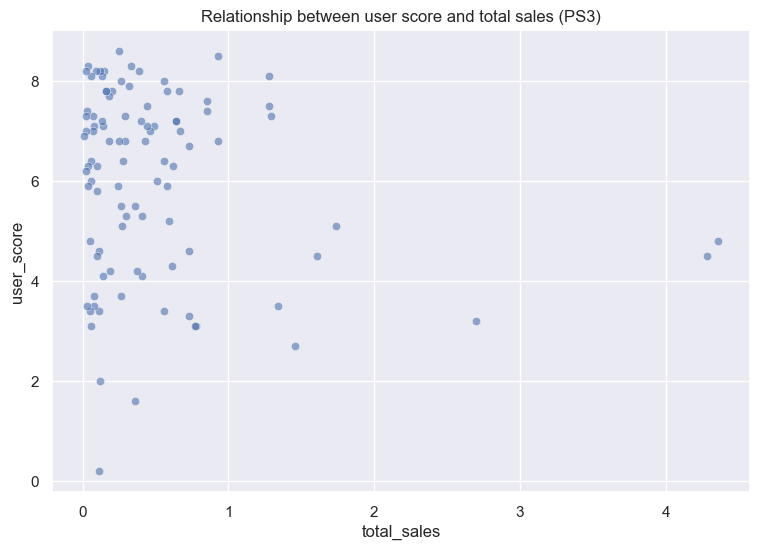

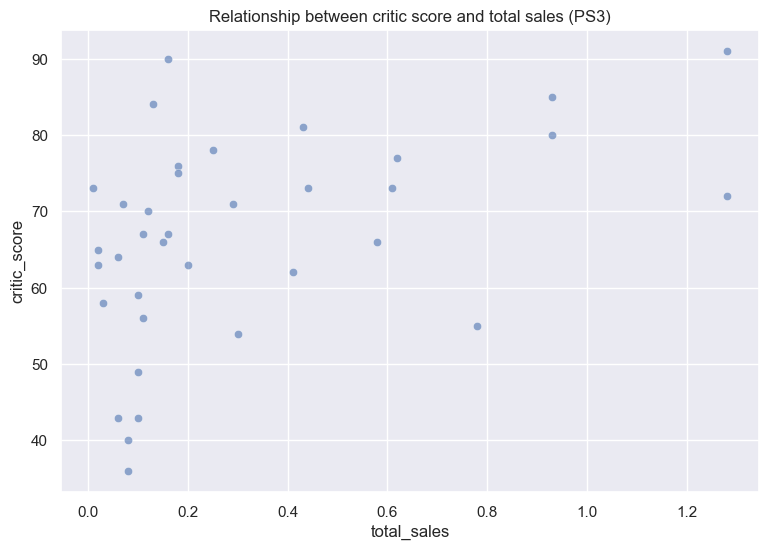

platform: X360
number of scores: 83
user score and total sales:
             total_sales  user_score
total_sales     1.000000   -0.138445
user_score     -0.138445    1.000000
number of scores: 26
critic score and total sales:
              total_sales  critic_score
total_sales      1.000000      0.525723
critic_score     0.525723      1.000000



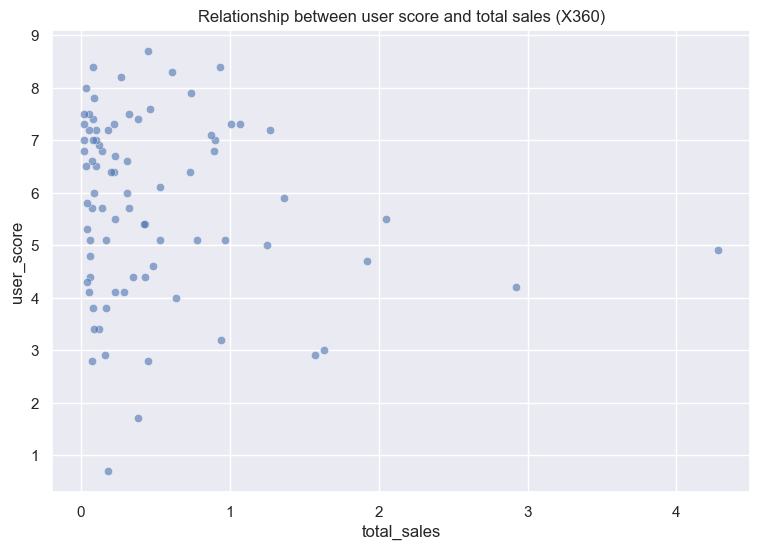

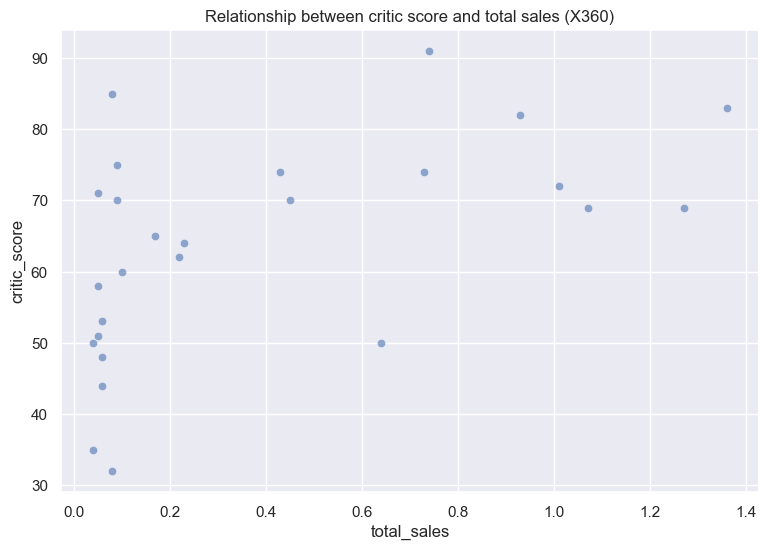

platform: PC
number of scores: 122
user score and total sales:
             total_sales  user_score
total_sales     1.000000   -0.071597
user_score     -0.071597    1.000000
number of scores: 116
critic score and total sales:
              total_sales  critic_score
total_sales      1.000000      0.174634
critic_score     0.174634      1.000000



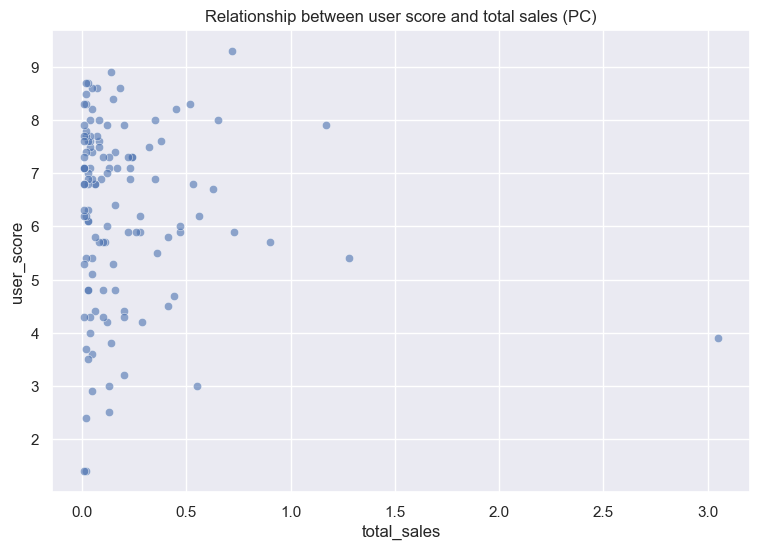

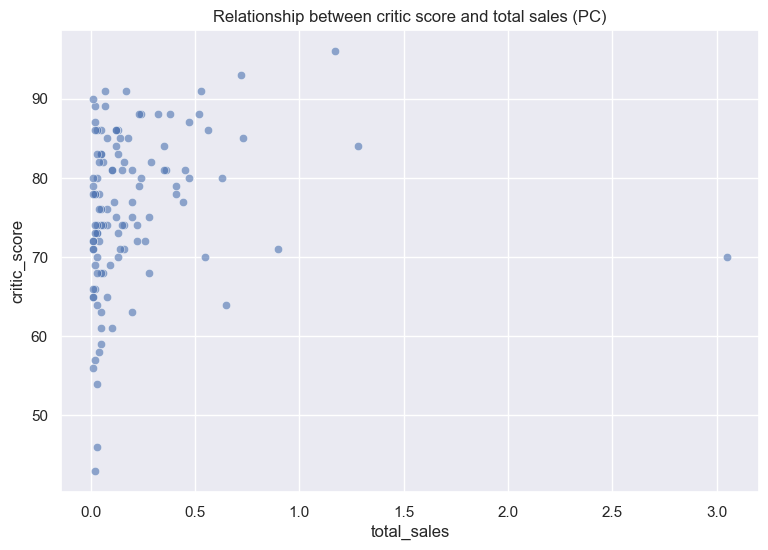

platform: Wii
number of scores: 2
user score and total sales:
             total_sales  user_score
total_sales          1.0         1.0
user_score           1.0         1.0
number of scores: 0
critic score and total sales:
              total_sales  critic_score
total_sales           1.0           NaN
critic_score          NaN           NaN



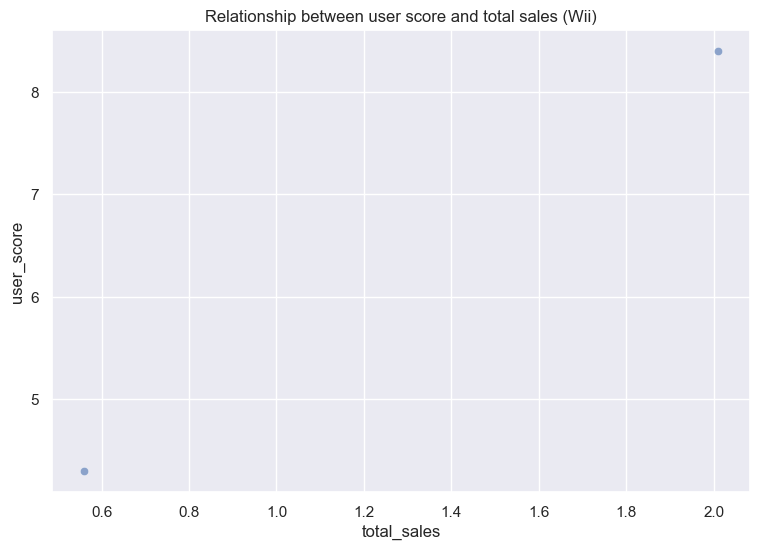

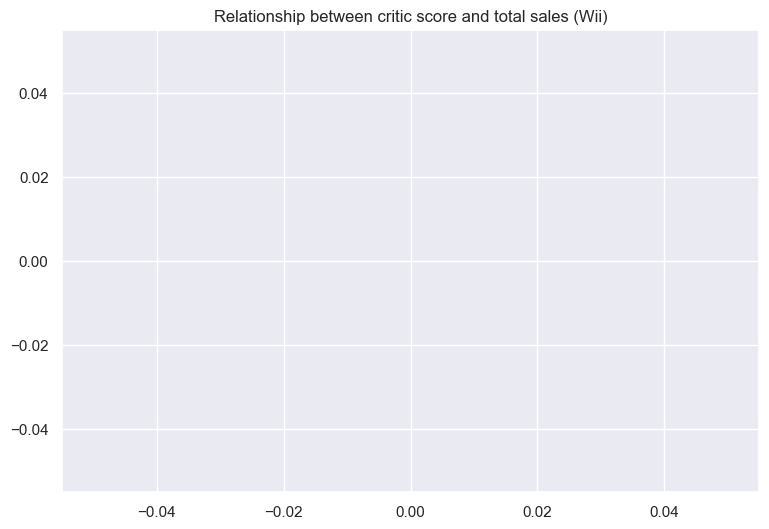

platform: PSV
number of scores: 73
user score and total sales:
             total_sales  user_score
total_sales     1.000000   -0.168455
user_score     -0.168455    1.000000
number of scores: 54
critic score and total sales:
              total_sales  critic_score
total_sales      1.000000      0.042665
critic_score     0.042665      1.000000



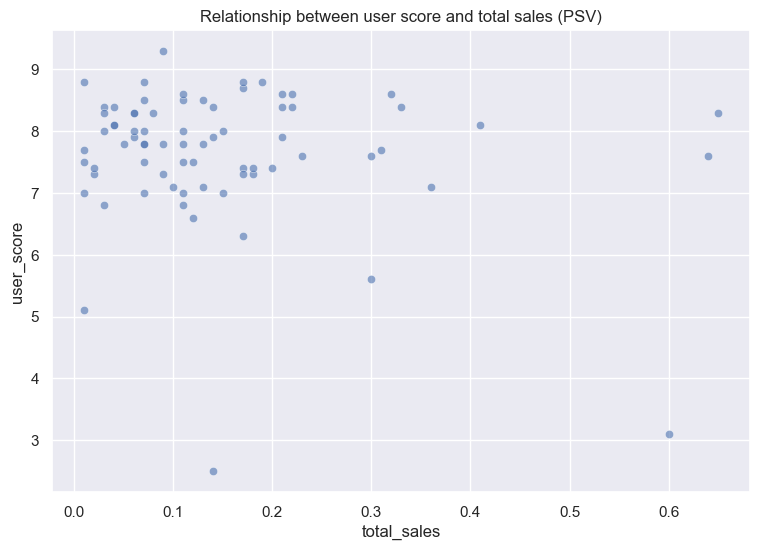

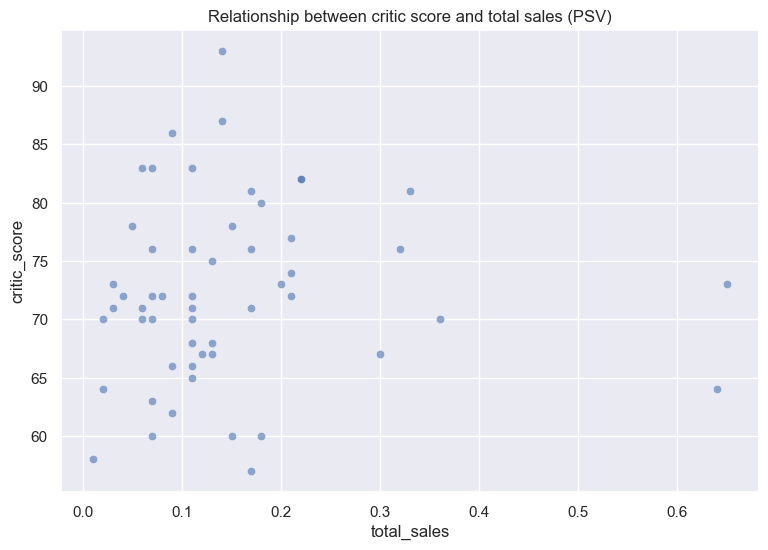

platform: PSP
number of scores: 0
user score and total sales:
             total_sales  user_score
total_sales          1.0         NaN
user_score           NaN         NaN
number of scores: 0
critic score and total sales:
              total_sales  critic_score
total_sales           1.0           NaN
critic_score          NaN           NaN



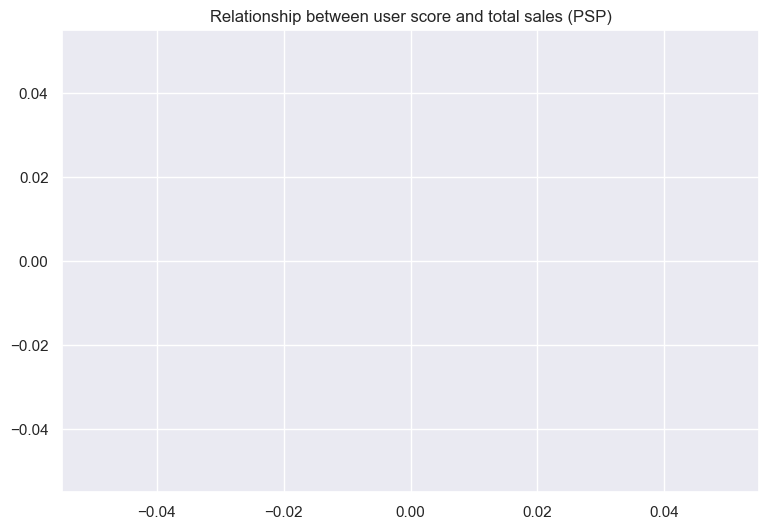

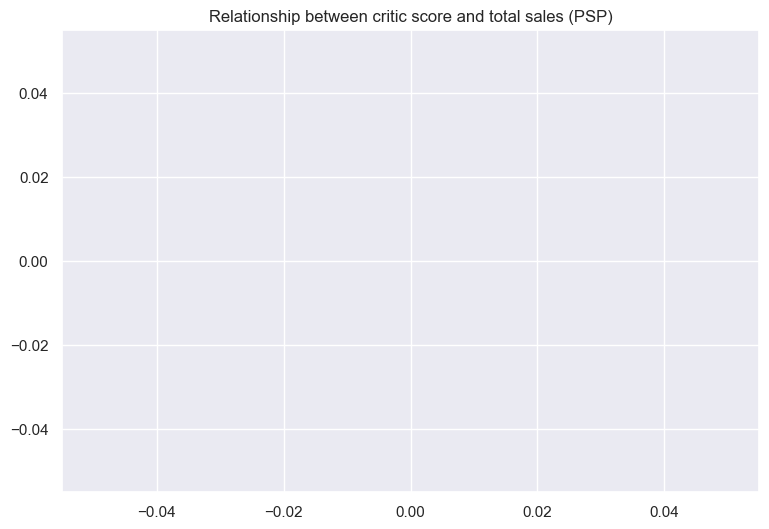

In [63]:
for platform in platforms:
    print(f'platform: {platform}')
    print(f"number of scores: {actual_df[actual_df.platform == platform]['user_score'].count()}")
    print('user score and total sales:')
    print(actual_df[(actual_df.platform == platform)][['total_sales', 'user_score']].corr())
    print(f"number of scores: {actual_df[actual_df.platform == platform]['critic_score'].count()}")
    print('critic score and total sales:')
    print(actual_df[(actual_df.platform == platform)][['total_sales', 'critic_score']].corr())
    print()
    sns.set(rc={'figure.figsize':(9, 6)})
    sns.scatterplot(data=actual_df[(actual_df.platform == platform)], 
                    x='total_sales', 
                    y='user_score', 
                    alpha=0.6).set_title(f'Relationship between user score and total sales ({platform})')
    plt.show()
    sns.scatterplot(data=actual_df[(actual_df.platform == platform)], 
                    x='total_sales', 
                    y='critic_score', 
                    alpha=0.6).set_title(f'Relationship between critic score and total sales ({platform})')
    plt.show()

Для большей части платформ (PS4, 3DS, XOne, PS3, X360) подверждаются выводы сделаные ранее. Для WiiU наблюдается средняя положительная корреляция глобальных продаж и с отзывами пользователей и с отзывами критиков. У PC и PSV отсутствует корреляция глобальных продаж и с отзывами пользователей и с отзывами критиков. PSP, Wii имеют недостаточно отзывов, чтобы сделать какие-то выводы о корреляции.

### Общее распределение игр по жанрам. Самых прибыльные жанры. Жанры с высокими и низкими продажами.

In [64]:
actual_df['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

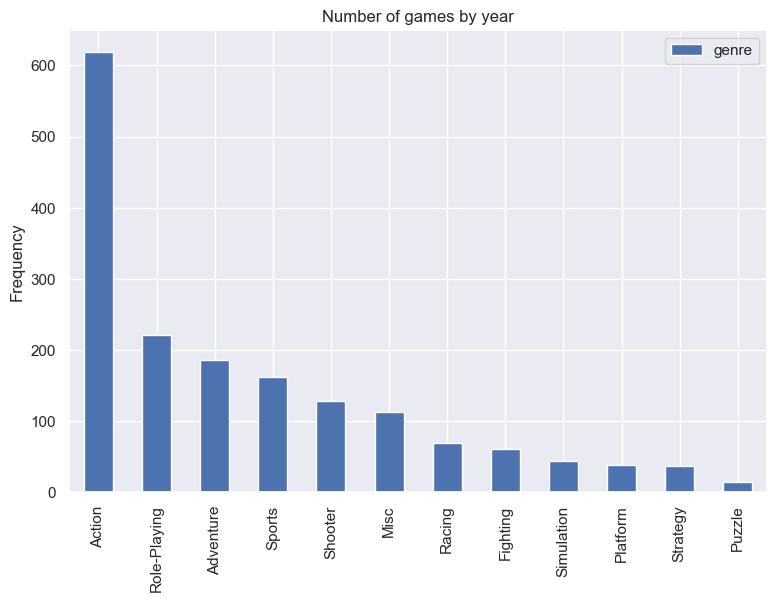

In [65]:
actual_df['genre'].value_counts().plot(kind='bar',
                                       grid=True,
                                       title='Number of games by year',
                                       ylabel='Frequency',
                                       legend=True,
                                       figsize=(9, 6));

In [66]:
actual_df['genre'].value_counts(normalize=True)

Action          0.366489
Role-Playing    0.130847
Adventure       0.109532
Sports          0.095323
Shooter         0.075784
Misc            0.066903
Racing          0.040853
Fighting        0.035524
Simulation      0.026051
Platform        0.022499
Strategy        0.021906
Puzzle          0.008289
Name: genre, dtype: float64

In [67]:
actual_df.genre.unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

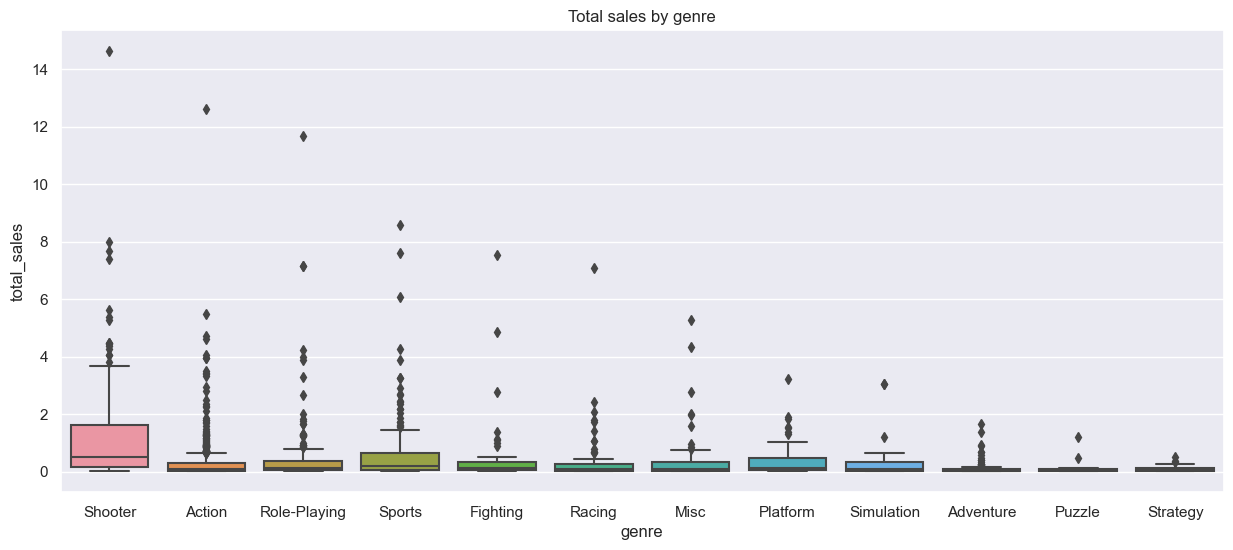

In [68]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(data=actual_df,
            x='genre',
            y='total_sales').set_title('Total sales by genre');

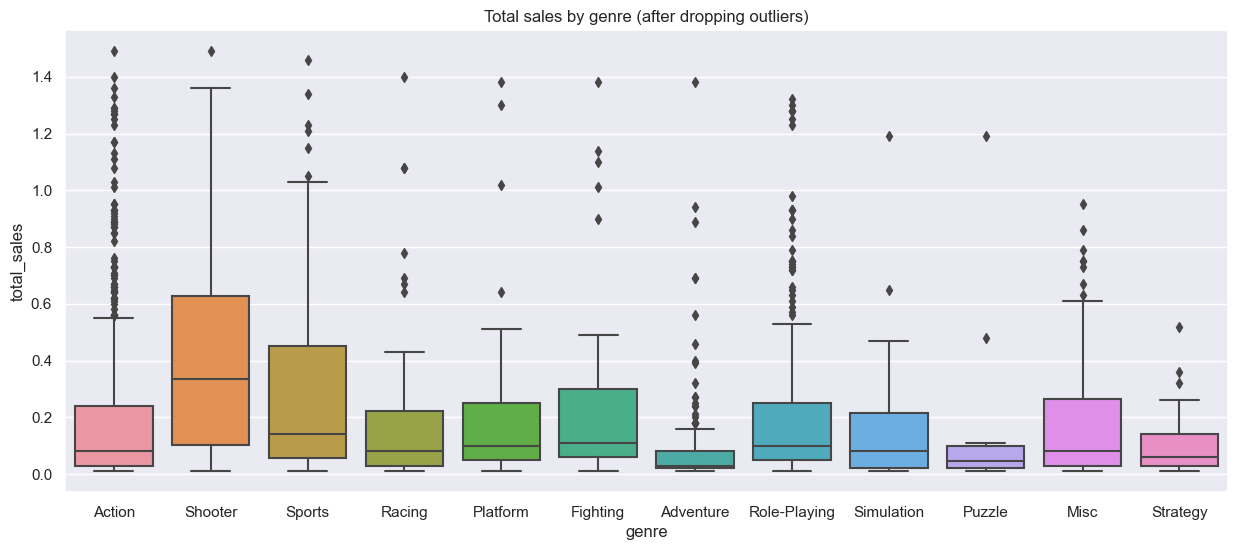

In [69]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(data=actual_df[actual_df.total_sales < 1.5],
            x='genre', 
            y='total_sales').set_title('Total sales by genre (after dropping outliers)');

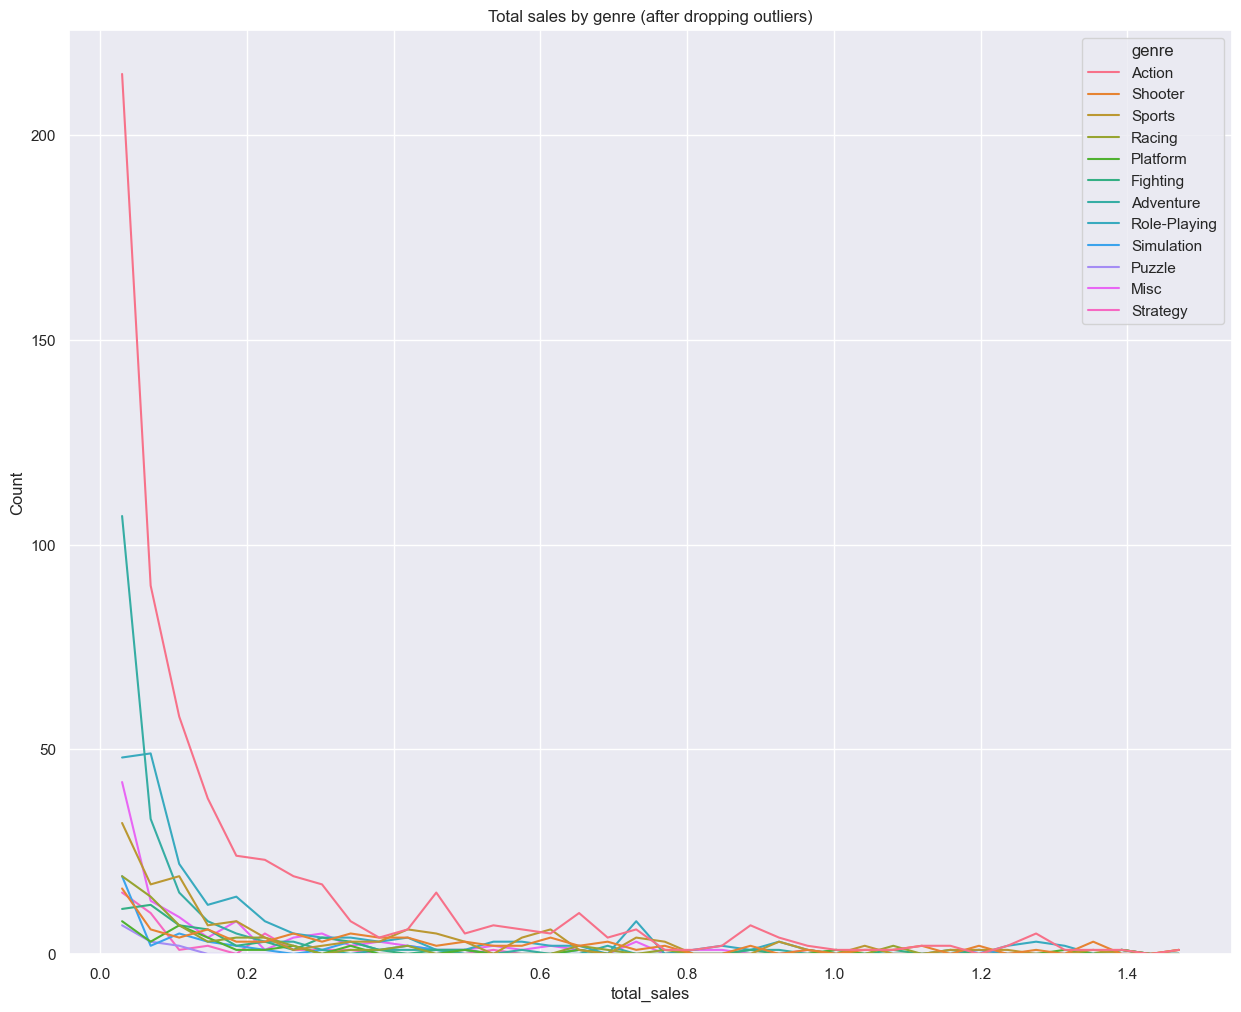

In [70]:
sns.set(rc={'figure.figsize':(15, 12)})
sns.histplot(data=actual_df[actual_df.total_sales < 1.5],
             x='total_sales', 
             hue='genre', 
             element="poly", 
             fill=False).set_title('Total sales by genre (after dropping outliers)');

In [71]:
total_sales_by_genre = actual_df.groupby('genre')['total_sales'].agg(['mean', 'median', 'sum'])
total_sales_by_genre.columns = ['mean_total_sales', 'median_total_sales', 'sum_total_sales']

In [72]:
total_sales_by_genre.mean_total_sales.sort_values(ascending=False)

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: mean_total_sales, dtype: float64

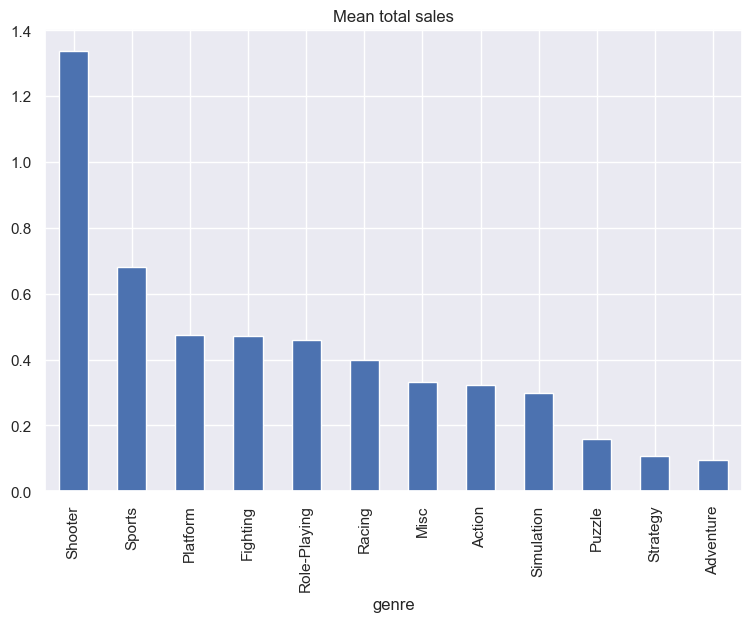

In [73]:
total_sales_by_genre.mean_total_sales.sort_values(ascending=False).plot(kind='bar',
                                                                        grid=True,
                                                                        title='Mean total sales',
                                                                        figsize=(9, 6));

In [74]:
total_sales_by_genre.median_total_sales.sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: median_total_sales, dtype: float64

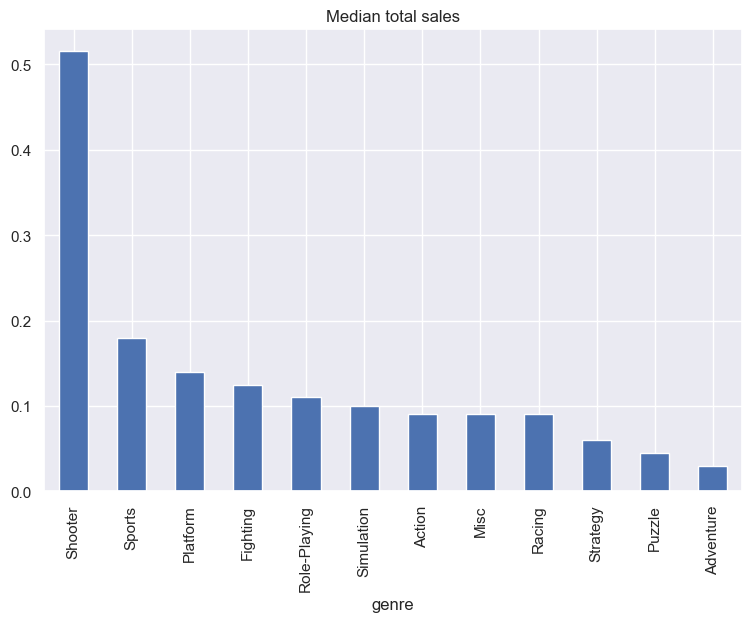

In [75]:
total_sales_by_genre.median_total_sales.sort_values(ascending=False).plot(kind='bar',
                                                                          grid=True,
                                                                          title='Median total sales',
                                                                          figsize=(9, 6));

In [76]:
total_sales_by_genre.sum_total_sales.sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: sum_total_sales, dtype: float64

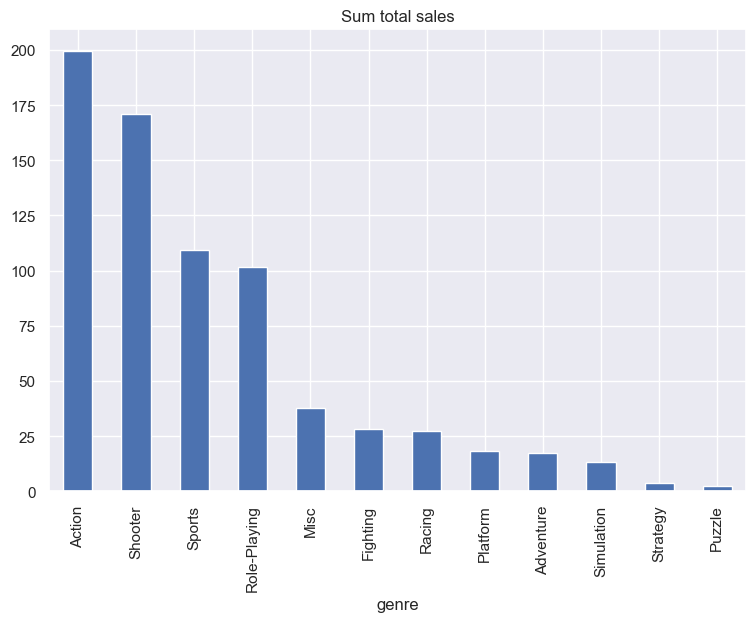

In [77]:
total_sales_by_genre.sum_total_sales.sort_values(ascending=False).plot(kind='bar',
                                                                       grid=True,
                                                                       title='Sum total sales',
                                                                       figsize=(9, 6));

Самый многочисленный жанр (37% от всех игр или 619 игр) - Action, второе и третье место по количеству игр занимают Role-Playing, Adventure. 

Самый малочисленный жанр (менее 1% или 14 игр) - Puzzle. Игр жанров Platform, Strategy также выпускается совсем немного. 

Для всех жанров характерно, что среднее значение общей прибыли с игры больше, чем медиана, а заначит в распределениях присутствует положительная ассиметрия. 

В среднем и медианно больше всего прибыли приносят жанры Shooter, Sports, Platform, меньше всего Strategy, Puzzle, Adventure.

По суммарным глобальным продажам в топе Action (во многом из-за очень большого количества игр этого жанра), Shooter, Sports. Simulation, Strategy, Puzzle в хвосте рейтинга.

## Портрет пользователя каждого региона. Опредение для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). Различия в долях продаж.

NA

platform
PS4       98.61
XOne      81.27
Others    31.19
X360      28.30
3DS       22.64
PS3       22.05
Name: na_sales, dtype: float64

platform
PS4       0.347145
XOne      0.286102
Others    0.109801
X360      0.099627
3DS       0.079701
PS3       0.077624
Name: na_sales, dtype: float64



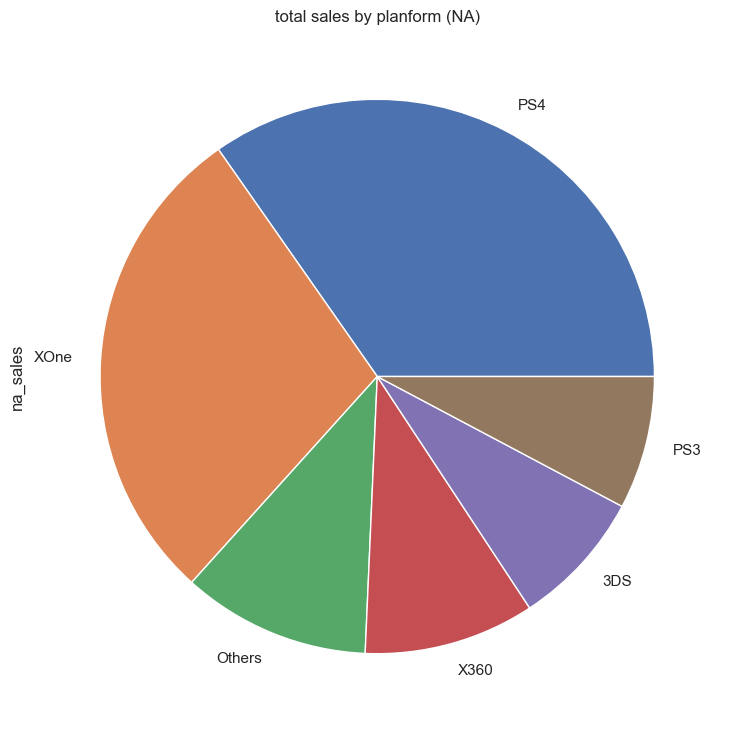

EU

platform
PS4       130.04
XOne       46.25
Others     34.76
PS3        25.54
PC         17.97
3DS        16.12
Name: eu_sales, dtype: float64

platform
PS4       0.480420
XOne      0.170866
Others    0.128417
PS3       0.094355
PC        0.066388
3DS       0.059554
Name: eu_sales, dtype: float64



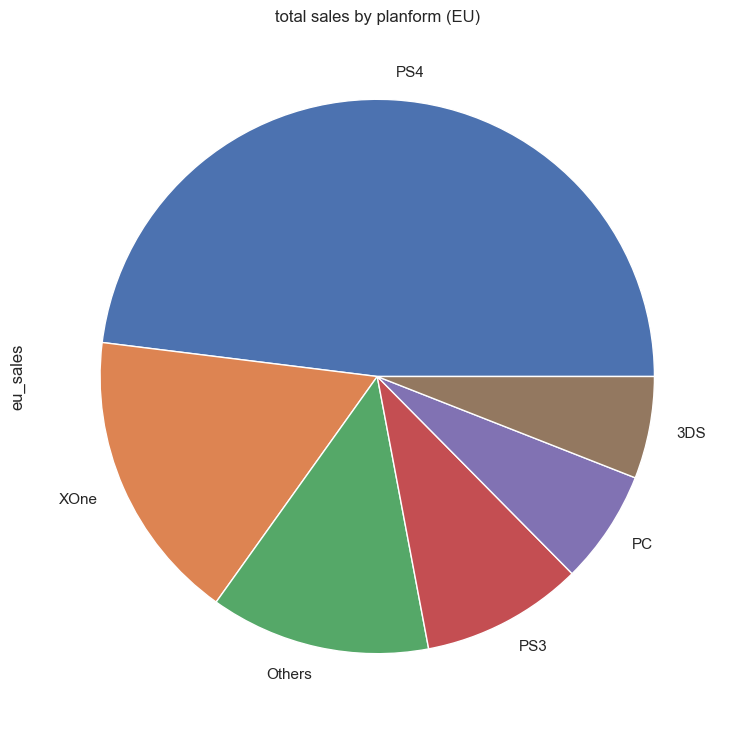

JP

platform
3DS       44.24
PS4       15.02
PSV       14.54
PS3       11.22
WiiU       7.31
Others     0.76
Name: jp_sales, dtype: float64

platform
3DS       0.475239
PS4       0.161349
PSV       0.156193
PS3       0.120529
WiiU      0.078526
Others    0.008164
Name: jp_sales, dtype: float64



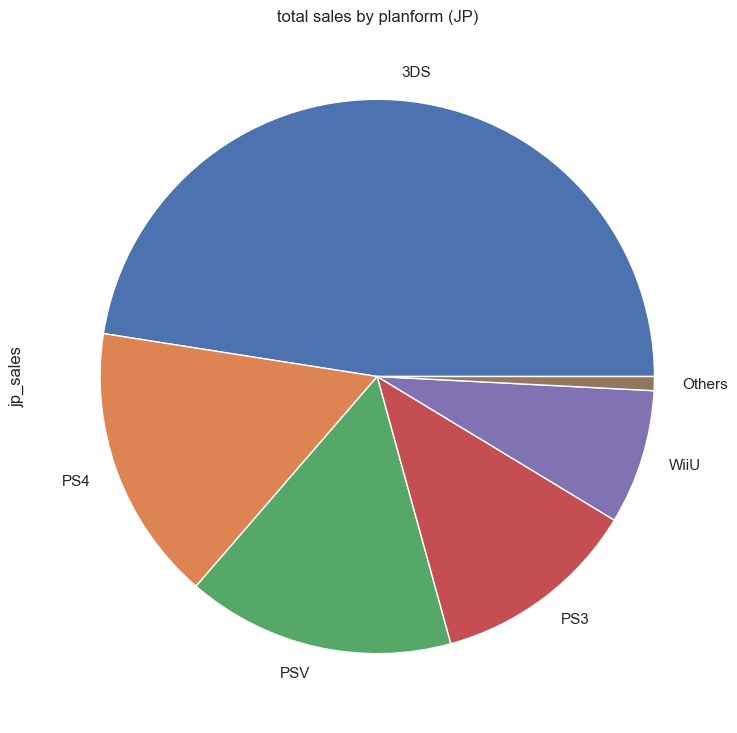

In [78]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    total_sales_by_platform = actual_df.groupby('platform')[column].agg(sum)
    top_5_platform = total_sales_by_platform.sort_values(ascending=False).head(5).index
    actual_df_temp = actual_df.copy()
    actual_df_temp['platform'] = actual_df_temp['platform'].where(lambda x: x.isin(top_5_platform), 'Others')
    top_5_platform = actual_df_temp.groupby('platform')[column].agg(sum).sort_values(ascending=False)
    print(column[:2].upper(), end='\n\n')
    print(top_5_platform, end='\n\n')
    print(top_5_platform / sum(top_5_platform), end='\n\n')
    top_5_platform.plot(kind='pie',
                        title=f'total sales by planform ({column[:2].upper()})',
                        figsize=(9, 9))
    plt.show()

Около 35% продаж Североамериканского рынка приходятся на платформу PS4, XOne немного отстает (~29%). X360, 3DS, PS3 - входят в пятерку лидеров по продажам в Северной Америке.

На Европейском рынке PS4 занимает значительно больший процент рынка, чем на Североамериканском, который составляет ~48%. Также как и в случае Северной Америке в Европе высоки продажи XOne, PS3, 3DS. PC присутствует в пятерке лидеров.

На Японском рынке ~48% занимает 3DS. PS4, PSV, PS3, WiiU входят в пятерку лидеров.

С точки зрения популярности платформ рынки Северной Америки и Европы очень похожи, рынок Японии, напротив, не похож ни на Европейский, ни на Североамериканский.

### Самые популярные жанры (топ-5).

NA

genre
Shooter         79.02
Action          72.53
Sports          46.13
Others          37.86
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

genre
Shooter         0.278181
Action          0.255333
Sports          0.162395
Others          0.133282
Role-Playing    0.117827
Misc            0.052982
Name: na_sales, dtype: float64



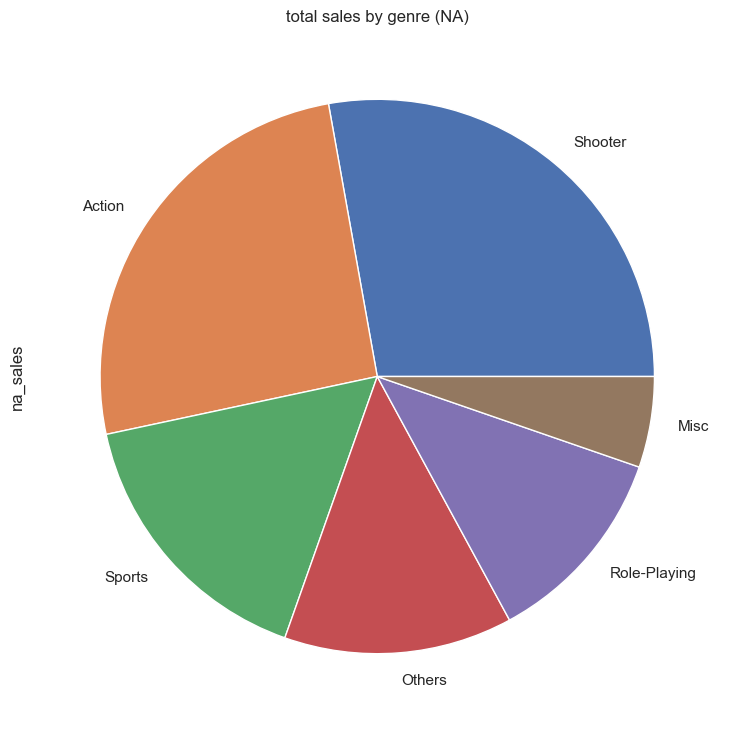

EU

genre
Action          74.68
Shooter         65.52
Sports          45.73
Others          42.45
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

genre
Action          0.275898
Shooter         0.242057
Sports          0.168945
Others          0.156827
Role-Playing    0.104071
Racing          0.052202
Name: eu_sales, dtype: float64



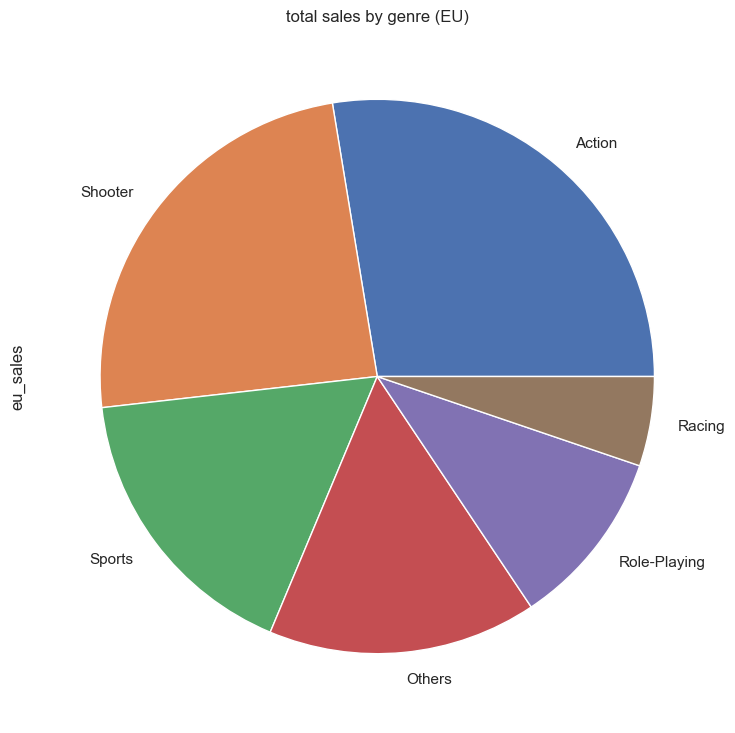

JP

genre
Role-Playing    31.16
Action          29.58
Others          15.50
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

genre
Role-Playing    0.334730
Action          0.317757
Others          0.166506
Fighting        0.068428
Misc            0.060264
Shooter         0.052315
Name: jp_sales, dtype: float64



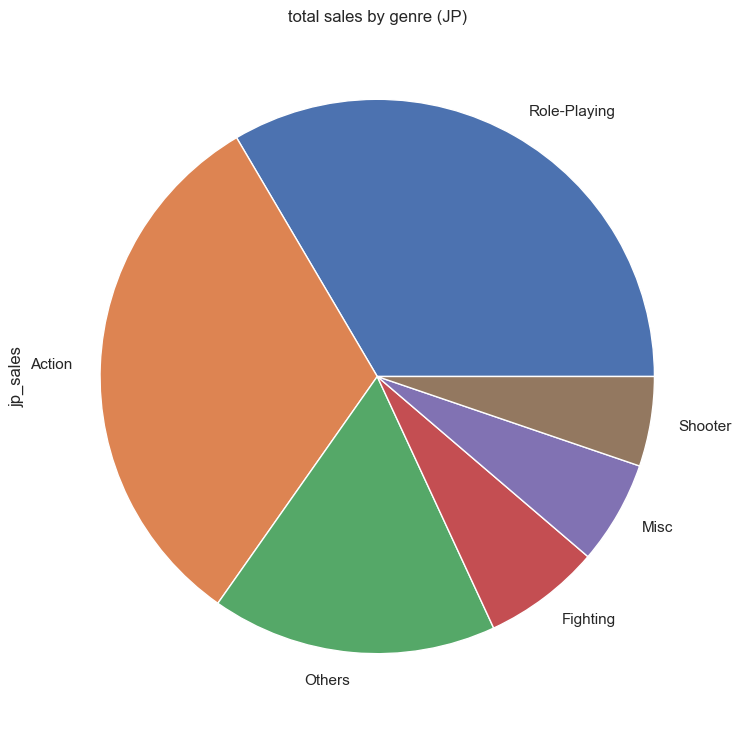

In [79]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    total_sales_by_genre = actual_df.groupby('genre')[column].agg(sum)
    top_5_genre = total_sales_by_genre.sort_values(ascending=False).head(5).index
    actual_df_temp = actual_df.copy()
    actual_df_temp['genre'] = actual_df_temp['genre'].where(lambda x: x.isin(top_5_genre), 'Others')
    top_5_genre = actual_df_temp.groupby('genre')[column].agg(sum).sort_values(ascending=False)
    print(column[:2].upper(), end='\n\n')
    print(top_5_genre, end='\n\n')
    print(top_5_genre / sum(top_5_genre), end='\n\n')
    top_5_genre.plot(kind='pie',
                     title=f'total sales by genre ({column[:2].upper()})',
                     figsize=(9, 9))
    plt.show()

В Северной Америке самые популярные жанры - это Shooter и Action (~28% и ~26% всего рынка), в пятерку входят Sports, Role-Playing, Misc.

В Европе также как и в Северной Америке лидеры по жанрам Action и Shooter (~28% и ~24% всего рынка), тут также эта пара суммарно занимает более половины рынка. В пятерке лидеров - Sports, Role-Playing, Racing.

В Японии самый популярный жанр Role-Playing (около 33%), это большое отличие от Северной Америки и Европы, где этот жанр не относится к числу самых популярных. На втором месте с небольшим отрывом Action (~32%). Суммарно Role-Playing и Action занимают около 2/3 всего японского рынка. С большим отрывом от двух лидеров в пятерку входят Fighting, Misc, Shooter. 

Также как и в случае с популяными платформами, в случае полуляных жанров Европейский и Североамериканский рынки похожи, а Японский имеет значительные отличия от них.

### Влияние рейтинга ESRB на продажи в отдельном регионе

NA

rating
M          96.42
Unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

rating
M          0.339435
Unknown    0.227839
E          0.178624
T          0.137119
E10+       0.116982
Name: na_sales, dtype: float64



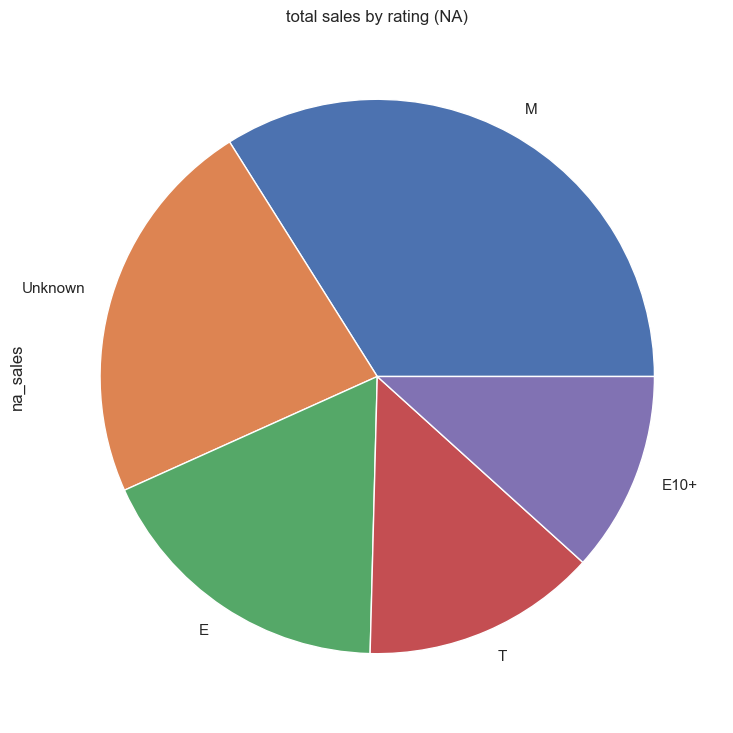

EU

rating
M          93.44
Unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

rating
M          0.345205
Unknown    0.217785
E          0.214497
T          0.125868
E10+       0.096645
Name: eu_sales, dtype: float64



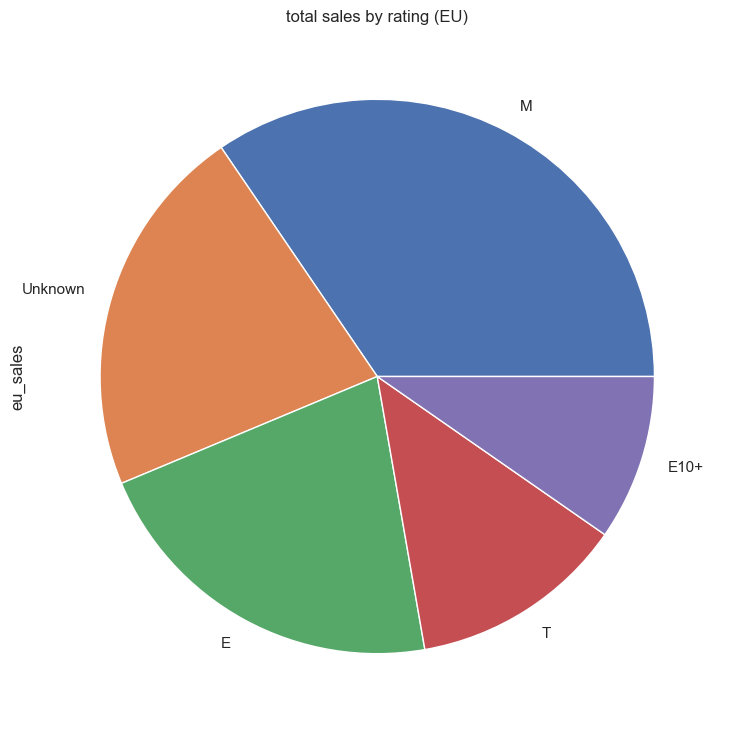

JP

rating
Unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

rating
Unknown    0.611236
T          0.158771
E          0.096036
M          0.086046
E10+       0.047911
Name: jp_sales, dtype: float64



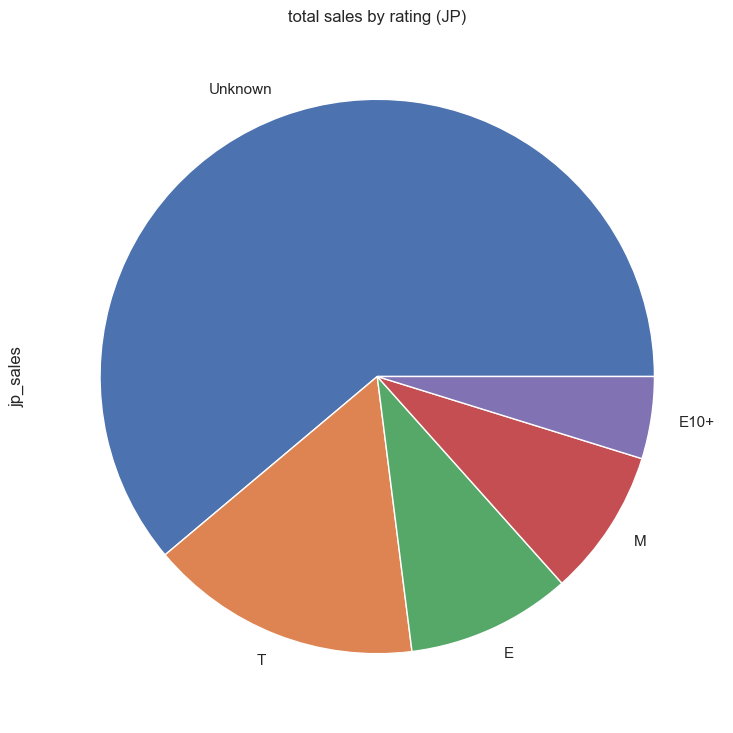

In [80]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    total_sales_by_rating = actual_df.groupby('rating')[column].agg(sum)
    top_5_rating = total_sales_by_rating.sort_values(ascending=False).head(5).index
    actual_df_temp = actual_df.copy()
    actual_df_temp['rating'] = actual_df_temp['rating'].where(lambda x: x.isin(top_5_rating), 'Others')
    top_5_rating = actual_df_temp.groupby('rating')[column].agg(sum).sort_values(ascending=False)
    print(column[:2].upper(), end='\n\n')
    print(top_5_rating, end='\n\n')
    print(top_5_rating / sum(top_5_rating), end='\n\n')
    top_5_rating.plot(kind='pie',
                     title=f'total sales by rating ({column[:2].upper()})',
                     figsize=(9, 9))
    plt.show()

Распределения продаж по рейтигу в Европе и в Севроной Америке практически одинаковы, чаще всего европейцы и североамериканцы тратят свои деньги на игры с рейтингом (М — для взрослой аудитории от 17 лет и старше). Для около 20% покупок, как европейцев, так и американцев, рейтинг не известен.

В Японии рейтинги неизвестны в около 60% покупок, возможно там есть другая маркировка игр и поэтому так часто эта колонка не заполнена. Самый популярный рейтинг Т — для подростков от 13 лет.

Если рассматривать только североамериканский и европейский рынки, нельзя сказать, что рейтиг как-то зависит от региона, распределения игр по рейтингам практически одинаковые. Данных о соотношении рейтингов на японском рынке не достаточно, чтобы сказать схоже распределение с Америкой и Европой или различно.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Уровень значимости выберу 0.01

Гипотезу проверю с помощью теста Стьюдента (scipy.stats.ttest_ind), который проверяет то, что 2 независимые выборки имеют идентичные средние (ожидаемые) значения.

In [81]:
user_score_XOne = actual_df[actual_df.platform == 'XOne']['user_score'].dropna()
user_score_XOne

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64

In [82]:
user_score_PC = actual_df[actual_df.platform == 'PC']['user_score'].dropna()
user_score_PC

458      3.9
1530     5.4
1730     7.9
2303     5.7
2784     5.9
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 122, dtype: float64

In [83]:
alpha = .01
results = st.ttest_ind(user_score_XOne, user_score_PC, equal_var=False)
print('p-значение:', results.pvalue)

p-значение: 0.11601398086668835


In [84]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Вывод: Значимых оснований для предположения, что пользовательские рейтинги платформ Xbox One и PC не одинаковые нет.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Уровень значимости выберу 0.01

Гипотезу проверю с помощью теста Стьюдента (scipy.stats.ttest_ind), который проверяет то, что 2 независимые выборки имеют идентичные средние (ожидаемые) значения.

In [85]:
user_score_Action = actual_df[actual_df.genre == 'Action']['user_score'].dropna()
user_score_Action

42       8.3
165      7.9
231      8.1
295      6.3
304      4.9
        ... 
16544    6.8
16597    6.0
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 297, dtype: float64

In [86]:
user_score_Sports = actual_df[actual_df.genre == 'Sports']['user_score'].dropna()
user_score_Sports

77       4.3
94       5.0
143      5.7
264      4.5
314      6.7
        ... 
16120    6.3
16142    8.8
16146    6.9
16518    1.4
16643    6.6
Name: user_score, Length: 127, dtype: float64

In [87]:
alpha = .01
results = st.ttest_ind(user_score_Action, user_score_Sports, equal_var=False)
print('p-значение:', results.pvalue)

p-значение: 1.1825550382644557e-14


In [88]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Вывод: Имеют место значимые основания считать, что пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод
В ходе подготовки данных были частично заполнены пропущенные значения в колонке года выпуска медианным значением по названию игры. Пропуски возрастного рейтинга были заполнены на Unknown. Удалены пропущенные значения в имени, жанре и годе выпуска игры. Изменены типы года выпуска на 'int16' и пользовательской оценки на 'float'. 99% были сохранены в датасете. Добавлен столбец суммарных продаж по всем регионам.

С 1980 до 1994  - слабое развитие рынка игр. С 1994 до 2008 быстрый рост рынка. 2006 - 2011 — пик развития  (в год производилось более 1000 игр). В 2012 произошел резкий спад из-за развития мобильных игр. С 2012 до 2016 стабилизация рынка на уровне около 550 игр в год. Рынок видеоигр очень зависит от периода времени.

Платформы с наибольшими суммарными PS2, X360, PS3, Wii, DS, PS, их суммарные продажи составляют 62.96% от суммы всех продаж. Распределения суммарных продаж по годам для этих платформ похожи на нормальное распределение.

Срок «жизни» платформы медианно и в среднем составляет около 8 лет. Платформа доходит до своего пика в среднем за 3 года, медианно за 2. "Падение" платформы в среднем 4 года, медианно 5. 

Согласно выводам предыдущего анализа, мной был выбран актуальный период для предсказания тенденций 2017 года - 3 года (2014-2016).

Потенциально прибыльные платформы - PS4, XOne, 3DS, PC, WiiU. 

В среднем с одной игры получают больше всего Wii, X360 и XOne, меньше всего PSP, PSV, PC. 

Для большей части платформ справедливы утверждения, между отзывами пользователей и продажами отсутствует корреляция, между отзывами критиков и продажами есть средняя положительная корреляция.

Самый многочисленный жанр (37% от всех игр или 619 игр) - Action, второе и третье место по количеству игр занимают Role-Playing, Adventure. Самый малочисленный жанр (менее 1% или 14 игр) - Puzzle. Игр жанров Platform, Strategy также выпускается совсем немного.
Для всех жанров характерно, что среднее значение общей прибыли с игры больше, чем медиана, а заначит в распределениях присутствует положительная ассиметрия.

В среднем и медианно больше всего прибыли приносят жанры Shooter, Sports, Platform, меньше всего Strategy, Puzzle, Adventure.

По суммарным глобальным продажам в топе Action (во многом из-за очень большого количества игр этого жанра), Shooter, Sports. Simulation, Strategy, Puzzle в хвосте рейтинга.

Североамериканцы предпочитают платформы PS4, XOne, жанры Action и Shooter, самые популяный возрастной рейтинг М.

Европейцы предпочитают платформу PS4, жанры Shooter и Action, самый популяный возрастной рейтинг М.

Японцы предпочитают платформу 3DS, жанры Role-Playing и Action, нельзя точно сказать какой рейтинг самый популярный из-за большого количества пропусков.

Портреты пользователей из Европы и Северной Америке схожи, пользователь из Японии значитель отличается от них.

Сформулированы и проверены гипотезы по заданным утверждениям, получены следующие результаты. Значимых оснований для предположения, что пользовательские рейтинги платформ Xbox One и PC не одинаковые нет. Имеют место значимые основания считать, что пользовательские рейтинги жанров Action и Sports различаются.